# DSCI521: Final Project - WoRLD of World

Submitted by:

- Group member 1
    - Name: Abhinav Mani Tripathi
    - Email: at3363@drexel.edu
- Group member 2
    - Name: Awanish Tiwari
    - Email: at3359@drexel.edu
- Group member 3
    - Name: Aishwarya Ravi
    - Email: ar3646@drexel.edu
- Group member 4
    - Name: Nupur Roy Chowdhury
    - Email: nr572@drexel.edu

## 1. Data Acquisition, Pre-processing and Cleaning

### 1.1. Import Modules to be used in Project

In [1]:
import pandas as pd  
import numpy as np  
import csv
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log

### 1.2. Defining funtion to be used later

-- Function Read_data is defined to read csv and split the dataframe based on given columns list

In [2]:
# function extracting specified columns from file as dataFrame object
def Read_data(filename,cols = []): 
    df = pd.read_csv(filename, header = 0) 
    if cols:
        return df[cols]
    else:
        return df

-- Function Country_Specific_Dataframe is defined to fill NaN values with the mean data of the values from year 1990-2018 for specific attribute for a particular country.

In [3]:
# function to fillna with mean value of dataframe
def Country_Specific_Dataframe(country_code):
    df_temp = df[df['Country Code'] == country_code]
    df_temp = df_temp.fillna(df_temp.mean())
    return df_temp

-- Function Read_country is defined to read the dataframe for specific countries and return only the needed columns.

In [4]:
# function to read country level data for Time series calculation
def Read_country(filename,country,cols = []): 
    df = pd.read_csv(filename, header = 0) 
    df = df.loc[df['Country Code'] == country]
    if cols:
        return df[cols]
    else:
        return df

-- Function datetime_conv is defined to convert the string data present in Year column of dataframe to datetime type so that it can be used for Time Series analysis.

In [5]:
def datetime_conv(df):
    df = df.replace({2018: datetime(2018,12,31,0,0),
                                2017: datetime(2017,12,31,0,0),
                                2016: datetime(2016,12,31,0,0),
                                2015: datetime(2015,12,31,0,0),
                                2014: datetime(2014,12,31,0,0),
                                2013: datetime(2013,12,31,0,0),
                                2012: datetime(2012,12,31,0,0),
                                2011: datetime(2011,12,31,0,0),
                                2010: datetime(2010,12,31,0,0),
                                2009: datetime(2009,12,31,0,0),
                                2008: datetime(2008,12,31,0,0),
                                2007: datetime(2007,12,31,0,0),
                                2006: datetime(2006,12,31,0,0),
                                2005: datetime(2005,12,31,0,0),
                                2004: datetime(2004,12,31,0,0),
                                2003: datetime(2003,12,31,0,0),
                                2002: datetime(2002,12,31,0,0),
                                2001: datetime(2001,12,31,0,0),
                                2000: datetime(2000,12,31,0,0),
                                1999: datetime(1999,12,31,0,0),
                                1998: datetime(1998,12,31,0,0),
                                1997: datetime(1997,12,31,0,0),
                                1996: datetime(1996,12,31,0,0),
                                1995: datetime(1995,12,31,0,0),
                                1994: datetime(1994,12,31,0,0),
                                1993: datetime(1993,12,31,0,0),
                                1992: datetime(1992,12,31,0,0),
                                1991: datetime(1991,12,31,0,0),
                                1990: datetime(1990,12,31,0,0)})
    return df

### 1.3. Working with dataset

In [6]:
#Read csv file using pandas
Raw_data = pd.read_csv("Raw_Data.csv")
Raw_data.head() 

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name           Series Code  \
0     Adjusted net national income (annual % growth)     NY.ADJ.NNTY.KD.ZG   
1         Adjusted net national income (current US$)        NY.ADJ.NNTY.CD   
2  Adjusted net national income per capita (annua...  NY.ADJ.NNTY.PC.KD.ZG   
3  Adjusted net national income per capita (curre...     NY.ADJ.NNTY.PC.CD   
4  Adjusted savings: consumption of fixed capital...        NY.ADJ.DKAP.CD   

   1990 [YR1990]  1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  1994 [YR1994]  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   1995 [YR1995]  ...  2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  \
0            NaN  ...            NaN            NaN            NaN   
1            NaN  ...   1.393045e+10   1.558421e+10   1.728768e+10   
2            NaN  ...            NaN            NaN            NaN   
3            NaN  ...   4.773070e+02   5.174484e+02   5.547792e+02   
4            NaN  ...   1.911412e+09   2.143552e+09   2.586918e+09   

   2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  \
0            NaN            NaN            NaN            NaN            NaN   
1   1.777915e+10   1.768240e+10   1.728514e+10   1.648293e+10   1.691699e+10   
2            NaN            NaN            NaN            NaN            NaN   
3   5.509567e+02   5.298764e+02   5.022764e+02   4.658416e+02   4.660791e+02   
4   2.807628e+09   2.753846e+09   2.755532e+09   2.600735e+09   2.660856e+09   

   2018 [YR2018]  2019 [YR2019]  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  

[5 rows x 34 columns]

In [7]:
#Modifying Columns as per our use
Years = []
for col in Raw_data.columns[4:]:
    Raw_data = Raw_data.rename(columns = {str(col) : int(str(col).split(' ')[0])})
    Years.append(int(str(col).split(' ')[0]))
    
# Pandas.melt() unpivots a DataFrame from wide format to long format.
Intermed_data = Raw_data.melt(id_vars =['Country Name', 'Country Code', 'Series Name'], value_vars=Years, var_name ='Year')
Intermed_data.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name  Year  value  
0     Adjusted net national income (annual % growth)  1990    NaN  
1         Adjusted net national income (current US$)  1990    NaN  
2  Adjusted net national income per capita (annua...  1990    NaN  
3  Adjusted net national income per capita (curre...  1990    NaN  
4  Adjusted savings: consumption of fixed capital...  1990    NaN

In [8]:
#Converting integer values to float
pd.options.display.float_format = '{:.2f}'.format #used to display the values in non exponential format with two precision 
Intermed_data['value'] = Intermed_data['value'].astype(float)

Intermed_data.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name  Year  value  
0     Adjusted net national income (annual % growth)  1990    nan  
1         Adjusted net national income (current US$)  1990    nan  
2  Adjusted net national income per capita (annua...  1990    nan  
3  Adjusted net national income per capita (curre...  1990    nan  
4  Adjusted savings: consumption of fixed capital...  1990    nan

In [9]:
#pandas.pivot_table create a spreadsheet-style pivot table as a DataFrame.
WoRLD_table = pd.pivot_table(Intermed_data, values='value', index=['Country Name', 'Country Code','Year'],columns=['Series Name'])

WoRLD_table.head()

Series Name                     Adjusted net national income (annual % growth)  \
Country Name Country Code Year                                                   
Afghanistan  AFG          1990                                             nan   
                          1991                                             nan   
                          1992                                             nan   
                          1993                                             nan   
                          1994                                             nan   

Series Name                     Adjusted net national income (current US$)  \
Country Name Country Code Year                                               
Afghanistan  AFG          1990                                         nan   
                          1991                                         nan   
                          1992                                         nan   
                          1993                                         nan   
                          1994                                         nan   

Series Name                     Adjusted net national income per capita (annual % growth)  \
Country Name Country Code Year                                                              
Afghanistan  AFG          1990                                                nan           
                          1991                                                nan           
                          1992                                                nan           
                          1993                                                nan           
                          1994                                                nan           

Series Name                     Adjusted net national income per capita (current US$)  \
Country Name Country Code Year                                                          
Afghanistan  AFG          1990                                                nan       
                          1991                                                nan       
                          1992                                                nan       
                          1993                                                nan       
                          1994                                                nan       

Series Name                     Adjusted savings: consumption of fixed capital (% of GNI)  \
Country Name Country Code Year                                                              
Afghanistan  AFG          1990                                                nan           
                          1991                                                nan           
                          1992                                                nan           
                          1993                                                nan           
                          1994                                                nan           

Series Name                     Adjusted savings: consumption of fixed capital (current US$)  \
Country Name Country Code Year                                                                 
Afghanistan  AFG          1990                                                nan              
                          1991                                                nan              
                          1992                                                nan              
                          1993                                                nan              
                          1994                                                nan              

Series Name                     Agriculture, forestry, and fishing, value added (% of GDP)  \
Country Name Country Code Year                                                               
Afghanistan  AFG          1990                                                nan        

In [10]:
# Saving a pandas dataframe to CSV so that it can be used as Raw if needed
WoRLD_table.to_csv('All_Data.csv', encoding='utf-8')

#Checking Country List
CL = Read_data("All_Data.csv", "Country Code")

#It should be 195 because that is the count of countries in World
len(CL.unique())

263

As the country list is higher than total countries present i.e 195 which means the data extracted contains some non country data which needs to be eliminated.

In [11]:
df = pd.read_csv("./All_Data.csv")

Unique_Country_Code = set()

for country_code in df['Country Code']:
    Unique_Country_Code.add(country_code)

country_sequence = 0    
for country_code in Unique_Country_Code:
    df_temp = Country_Specific_Dataframe(country_code) #Using function Country_Specific_Dataframe
    if country_sequence != 0:
        Final_df = pd.concat([Final_df,df_temp],axis=0)
    else:
        Final_df = df_temp
    country_sequence += 1
    

In [12]:
Final_df.head()

Country Name Country Code  Year  \
1566      Denmark          DNK  1990   
1567      Denmark          DNK  1991   
1568      Denmark          DNK  1992   
1569      Denmark          DNK  1993   
1570      Denmark          DNK  1994   

      Adjusted net national income (annual % growth)  \
1566                                            1.97   
1567                                            0.09   
1568                                            3.36   
1569                                            0.54   
1570                                            5.39   

      Adjusted net national income (current US$)  \
1566                             112299000000.00   
1567                             111772000000.00   
1568                             123562000000.00   
1569                             116466000000.00   
1570                             127804000000.00   

      Adjusted net national income per capita (annual % growth)  \
1566                                               1.81           
1567                                              -0.17           
1568                                               3.02           
1569                                               0.21           
1570                                               5.03           

      Adjusted net national income per capita (current US$)  \
1566                                           21844.06       
1567                                           21685.21       
1568                                           23893.55       
1569                                           22446.35       
1570                                           24548.45       

      Adjusted savings: consumption of fixed capital (% of GNI)  \
1566                                              16.41           
1567                                              16.96           
1568                                              16.83           
1569                                              17.12           
1570                                              16.75           

      Adjusted savings: consumption of fixed capital (current US$)  \
1566                                     22152077303.00              
1567                                     22891254657.00              
1568                                     25074627095.00              
1569                                     24139472228.00              
1570                                     25799573467.00              

      Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
1566                                               3.29           ...   
1567                                               3.03           ...   
1568                                               2.79           ...   
1569                                               2.69           ...   
1570                                               2.60           ...   

      Oil rents (% of GDP)  Personal remittances, received (% of GDP)  \
1566                  0.45                                       0.36   
1567                  0.25                                       0.36   
1568                  0.26                                       0.30   
1569                  0.29                                       0.31   
1570                  0.27                                       0.28   

      Research and development expenditure (% of GDP)  \
1566                                             2.61   
1567                                             2.61   
1568                                             2.61   
1569                                             2.61   
1570                                             2.61   

      Revenue, excluding grants (% of GDP)  Services, value added (% of GDP)  \
1566                                 36.70                             60.89   
1567                                 35.50                             61.55   
1568                                 36.74     

In [13]:
#Handling rest of NaN and Dropping some
Final_df1 = Final_df.fillna(0)
#Final_df1 = (Final_df.ffill(axis ='rows')).dropna(axis = 'rows')
Final_df1.head()

Country Name Country Code  Year  \
1566      Denmark          DNK  1990   
1567      Denmark          DNK  1991   
1568      Denmark          DNK  1992   
1569      Denmark          DNK  1993   
1570      Denmark          DNK  1994   

      Adjusted net national income (annual % growth)  \
1566                                            1.97   
1567                                            0.09   
1568                                            3.36   
1569                                            0.54   
1570                                            5.39   

      Adjusted net national income (current US$)  \
1566                             112299000000.00   
1567                             111772000000.00   
1568                             123562000000.00   
1569                             116466000000.00   
1570                             127804000000.00   

      Adjusted net national income per capita (annual % growth)  \
1566                                               1.81           
1567                                              -0.17           
1568                                               3.02           
1569                                               0.21           
1570                                               5.03           

      Adjusted net national income per capita (current US$)  \
1566                                           21844.06       
1567                                           21685.21       
1568                                           23893.55       
1569                                           22446.35       
1570                                           24548.45       

      Adjusted savings: consumption of fixed capital (% of GNI)  \
1566                                              16.41           
1567                                              16.96           
1568                                              16.83           
1569                                              17.12           
1570                                              16.75           

      Adjusted savings: consumption of fixed capital (current US$)  \
1566                                     22152077303.00              
1567                                     22891254657.00              
1568                                     25074627095.00              
1569                                     24139472228.00              
1570                                     25799573467.00              

      Agriculture, forestry, and fishing, value added (% of GDP)  ...  \
1566                                               3.29           ...   
1567                                               3.03           ...   
1568                                               2.79           ...   
1569                                               2.69           ...   
1570                                               2.60           ...   

      Oil rents (% of GDP)  Personal remittances, received (% of GDP)  \
1566                  0.45                                       0.36   
1567                  0.25                                       0.36   
1568                  0.26                                       0.30   
1569                  0.29                                       0.31   
1570                  0.27                                       0.28   

      Research and development expenditure (% of GDP)  \
1566                                             2.61   
1567                                             2.61   
1568                                             2.61   
1569                                             2.61   
1570                                             2.61   

      Revenue, excluding grants (% of GDP)  Services, value added (% of GDP)  \
1566                                 36.70                             60.89   
1567                                 35.50                             61.55   
1568                                 36.74     

Data is not in sorted order so the index needs to be sorted before proceeding further.

In [14]:
#sorting with index values
Final_df1 = Final_df1.sort_index(axis = 0) 
Final_df1.to_csv('All_New_Data.csv', encoding='utf-8', index=False)

In [15]:
#After inspection we found that there are some non country data as well in Dataset
Non_Country_List = ["LCA","MAF","VIR","PSE","PRK","XKX","MAC","NCL","MNP","GIB","GUM","HKG","IMN","CUW","COD","CIV","CYM","CHI","ABW","ASM","ARB","BMU","VGB","CSS","CEB","EAR","EAS","EAP","TEA","EMU","ECS","ECA","TEC","EUU","FCS","HPC","HIC","LTE","LCN","LAC","TLA","LDC","LMY","LIC","LMC","MEA","MNA","TMN","MIC","NAC","INX","OED","OSS","PSS","PST","PRE","SST","SAS","TSA","SSF","SSA","TSS","UMC","WLD","IBD","IBT","IDB","IDX","IDA"]

In [16]:
#Reading Data
Country_Data = pd.read_csv("All_New_Data.csv")

#Saving Header to be used later
Header = list(Country_Data.columns.values)

#Converting in List
Country_List = Country_Data.values.tolist()

Final_List=[]
for List in Country_List:
    if List[1] not in Non_Country_List:
        Final_List.append(List)
        
with open("./Intermed_Data.csv", "w",encoding='utf-8',newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(Header)    
    for write_col in Final_List:
        csv_writer.writerow(write_col)

In [17]:
#Checking Country List
CLN = Read_data("Intermed_Data.csv", "Country Code")

#It should be 195 because that is the count of countries in World
len(CLN.unique())

195

Now our data is having the data for all the countries present in this World and all the non-country data is eliminated. We are in good position to create our final dataframe for EDA and Modelling.

## 2. Dataset modification and final dataframe formation

In [18]:
WoRLD_data = pd.read_csv('Intermed_Data.csv')
WoRLD_data.shape

(5559, 89)

To have a good picture of corelated attributes it is good to have heatmap of all the attributes.

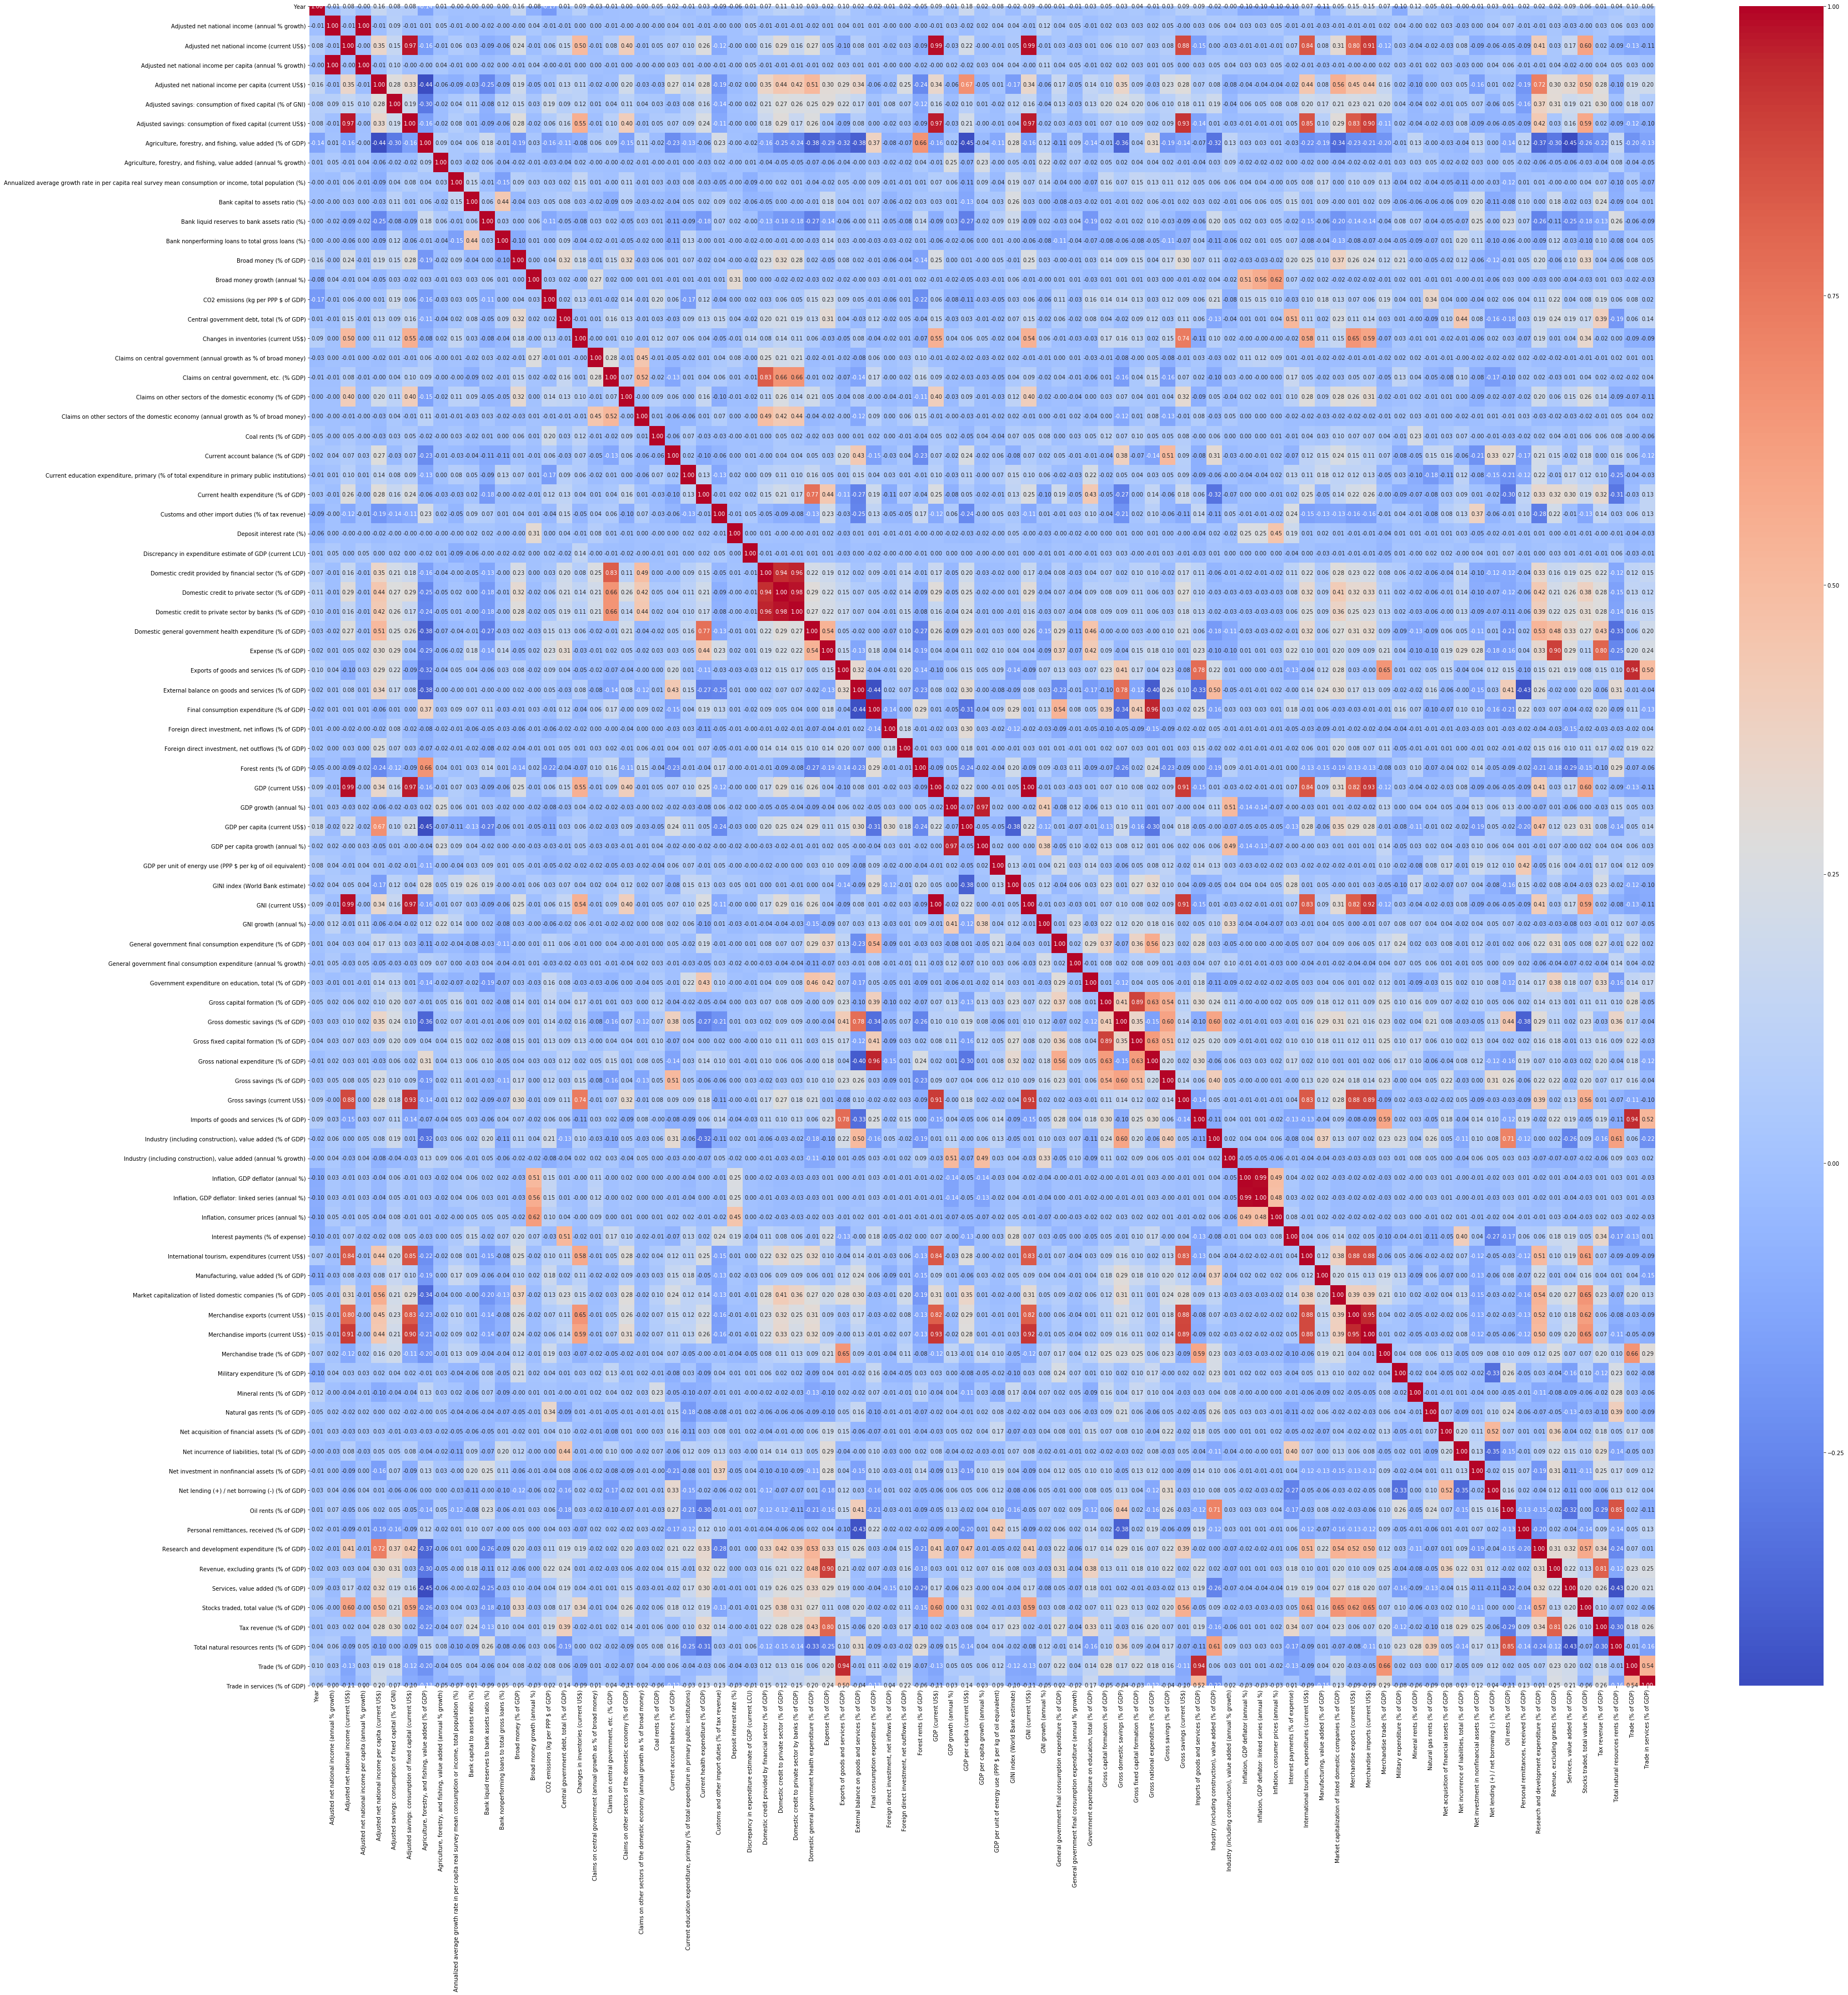

In [19]:
#Finding Corelation to modify dataframe
plt.figure(figsize=(50,50))
sns.heatmap(data=WoRLD_data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.tight_layout()
plt.show()

After observing Heatmap we can find some of the less corelated attributes and some attributes which can be clubbed together to have more meaningful significance in corelation.

The columns are clubbed with financial domain knowledge and information recieved from IMF details abour WoRLD.

In [20]:
# New Column(attributes) creation by merging similar columns to one

WoRLD_data['Value Added (% of GDP)'] = WoRLD_data['Agriculture, forestry, and fishing, value added (% of GDP)'] + WoRLD_data['Manufacturing, value added (% of GDP)'] + WoRLD_data['Services, value added (% of GDP)'] + WoRLD_data['Industry (including construction), value added (% of GDP)']

WoRLD_data['Bank assets ratio (% of GDP)'] = WoRLD_data['Bank capital to assets ratio (%)'] + WoRLD_data['Bank liquid reserves to bank assets ratio (%)']

WoRLD_data['Claims on economy (% of broad money)'] = WoRLD_data['Claims on other sectors of the domestic economy (annual growth as % of broad money)'] + WoRLD_data['Claims on central government (annual growth as % of broad money)']

WoRLD_data['Claims on economy (% of GDP)'] = WoRLD_data['Claims on central government, etc. (% GDP)'] + WoRLD_data['Claims on other sectors of the domestic economy (% of GDP)']

WoRLD_data['Current Expenditure (% of GDP)'] = WoRLD_data['Expense (% of GDP)'] + WoRLD_data['Domestic general government health expenditure (% of GDP)'] + WoRLD_data['Current health expenditure (% of GDP)'] + WoRLD_data['General government final consumption expenditure (% of GDP)'] + WoRLD_data['Government expenditure on education, total (% of GDP)'] + WoRLD_data['Research and development expenditure (% of GDP)']+ WoRLD_data['Final consumption expenditure (% of GDP)']+ WoRLD_data['Military expenditure (% of GDP)']

WoRLD_data['Domestic credit (% of GDP)'] = WoRLD_data['Domestic credit provided by financial sector (% of GDP)'] + WoRLD_data['Domestic credit to private sector (% of GDP)'] + WoRLD_data['Domestic credit to private sector by banks (% of GDP)']

WoRLD_data['Gross capital formation (% of GDP)'] = WoRLD_data['Gross capital formation (% of GDP)'] + WoRLD_data['Gross fixed capital formation (% of GDP)']

WoRLD_data['Gross domestic savings (% of GDP)'] = WoRLD_data['Gross domestic savings (% of GDP)'] + WoRLD_data['Gross savings (% of GDP)']

WoRLD_data['Current rents (% of GDP)'] = WoRLD_data['Mineral rents (% of GDP)'] + WoRLD_data['Oil rents (% of GDP)'] + WoRLD_data['Total natural resources rents (% of GDP)'] + WoRLD_data['Natural gas rents (% of GDP)']

WoRLD_data['Recieved revenue (% of GDP)'] = WoRLD_data['Personal remittances, received (% of GDP)'] + WoRLD_data['Tax revenue (% of GDP)'] + WoRLD_data['Revenue, excluding grants (% of GDP)']

WoRLD_data['Trade (% of GDP)'] = WoRLD_data['Trade (% of GDP)'] + WoRLD_data['Trade in services (% of GDP)'] + WoRLD_data['Merchandise trade (% of GDP)']

WoRLD_data.shape

(5559, 97)

In [21]:
#Removing Less corelated columns and ones already used above to create new columns

WoRLD_data = WoRLD_data.drop(['Adjusted net national income (annual % growth)', 'Adjusted net national income per capita (annual % growth)', 'Adjusted net national income per capita (current US$)',
                                       'Agriculture, forestry, and fishing, value added (annual % growth)', 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
                                       'Bank capital to assets ratio (%)', 'Bank liquid reserves to bank assets ratio (%)', 'Bank nonperforming loans to total gross loans (%)',
                                       'Broad money growth (annual %)', 'Central government debt, total (% of GDP)', 'Claims on central government (annual growth as % of broad money)',
                                       'Claims on other sectors of the domestic economy (annual growth as % of broad money)', 'Claims on central government, etc. (% GDP)',
                                       'Claims on other sectors of the domestic economy (% of GDP)', 'Current account balance (% of GDP)',
                                       'Current education expenditure, primary (% of total expenditure in primary public institutions)', 'Expense (% of GDP)', 'Domestic general government health expenditure (% of GDP)',
                                       'Current health expenditure (% of GDP)', 'Customs and other import duties (% of tax revenue)', 'Deposit interest rate (%)',
                                       'Discrepancy in expenditure estimate of GDP (current LCU)', 'Domestic credit provided by financial sector (% of GDP)', 'Domestic credit to private sector (% of GDP)',
                                       'Domestic credit to private sector by banks (% of GDP)', 'External balance on goods and services (% of GDP)', 'GDP growth (annual %)',
                                       'GDP per capita (current US$)', 'GDP per capita growth (annual %)', 'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
                                       'GINI index (World Bank estimate)', 'GNI growth (annual %)', 'General government final consumption expenditure (% of GDP)',
                                       'Government expenditure on education, total (% of GDP)', 'Research and development expenditure (% of GDP)',
                                       'Final consumption expenditure (% of GDP)', 'Military expenditure (% of GDP)', 'General government final consumption expenditure (annual % growth)',
                                       'Gross fixed capital formation (% of GDP)', 'Gross savings (% of GDP)', 'Gross savings (current US$)',
                                       'Industry (including construction), value added (annual % growth)', 'Inflation, GDP deflator: linked series (annual %)',
                                       'Inflation, consumer prices (annual %)', 'Interest payments (% of expense)', 'Market capitalization of listed domestic companies (% of GDP)',
                                       'Mineral rents (% of GDP)', 'Oil rents (% of GDP)', 'Total natural resources rents (% of GDP)', 'Natural gas rents (% of GDP)',
                                       'Net acquisition of financial assets (% of GDP)', 'Net incurrence of liabilities, total (% of GDP)', 'Net investment in nonfinancial assets (% of GDP)',
                                       'Net lending (+) / net borrowing (-) (% of GDP)', 'Personal remittances, received (% of GDP)', 'Tax revenue (% of GDP)', 'Revenue, excluding grants (% of GDP)',
                                       'Stocks traded, total value (% of GDP)', 'Trade in services (% of GDP)', 'Changes in inventories (current US$)', 'Adjusted savings: consumption of fixed capital (% of GNI)',
                                        'Agriculture, forestry, and fishing, value added (% of GDP)', 'Manufacturing, value added (% of GDP)', 'Services, value added (% of GDP)', 'Industry (including construction), value added (% of GDP)',
                                        'Merchandise trade (% of GDP)', 'Claims on economy (% of broad money)'], axis=1)

WoRLD_data.head()

Country Name Country Code  Year  Adjusted net national income (current US$)  \
0  Afghanistan          AFG  1990                              15989594152.44   
1  Afghanistan          AFG  1991                              15989594152.44   
2  Afghanistan          AFG  1992                              15989594152.44   
3  Afghanistan          AFG  1993                              15989594152.44   
4  Afghanistan          AFG  1994                              15989594152.44   

   Adjusted savings: consumption of fixed capital (current US$)  \
0                                      1645007932.56              
1                                      1645007932.56              
2                                      1645007932.56              
3                                      1645007932.56              
4                                      1645007932.56              

   Broad money (% of GDP)  CO2 emissions (kg per PPP $ of GDP)  \
0                   32.25                                 0.12   
1                   32.25                                 0.12   
2                   32.25                                 0.12   
3                   32.25                                 0.12   
4                   32.25                                 0.12   

   Coal rents (% of GDP)  Exports of goods and services (% of GDP)  \
0                   0.16                                     21.81   
1                   0.16                                     21.81   
2                   0.16                                     21.81   
3                   0.16                                     21.81   
4                   0.16                                     21.81   

   Foreign direct investment, net inflows (% of GDP)  ...  \
0                                               1.25  ...   
1                                               1.25  ...   
2                                               1.25  ...   
3                                               1.25  ...   
4                                               1.25  ...   

   Merchandise exports (current US$)  Merchandise imports (current US$)  \
0                       235000000.00                       936000000.00   
1                       189000000.00                       443000000.00   
2                       181000000.00                       398000000.00   
3                       688000000.00                       465000000.00   
4                       105000000.00                       391000000.00   

   Trade (% of GDP)  Value Added (% of GDP)  Bank assets ratio (% of GDP)  \
0            139.86                  111.01                         66.55   
1            139.86                  111.01                         66.55   
2            139.86                  111.01                         66.55   
3            139.86                  111.01                         66.55   
4            139.86                  111.01                         66.55   

   Claims on economy (% of GDP)  Current Expenditure (% of GDP)  \
0                         -6.66                          183.71   
1                         -6.66                          183.71   
2                         -6.66                          183.71   
3                         -6.66                          183.71   
4                         -6.66                          183.71   

   Domestic credit (% of GDP)  Current rents (% of GDP)  \
0                       11.02                      0.64   
1                       11.02                      0.64   
2                       11.02                      0.64   
3                       11.02                      0.64   
4                       11.02                      0.64   

   Recieved revenue (% of GDP)  
0                        19.46  
1                        19.46  
2                        19.46  
3                        19.46  
4                        19.46  

[5 rows x 30 columns]

In [22]:
WoRLD_data.to_csv('WoRLD_Data.csv', encoding='utf-8', index=False)

Saving the dataframe so far to csv so that it can be used from here. Setting index = false because we don't want extra column of indexes.

## 3. Exploratory Data Analysis

In [23]:
#display.float_format is used to avoid exponential values
pd.options.display.float_format = '{:.2f}'.format
WoRLD_data.head()

Country Name Country Code  Year  Adjusted net national income (current US$)  \
0  Afghanistan          AFG  1990                              15989594152.44   
1  Afghanistan          AFG  1991                              15989594152.44   
2  Afghanistan          AFG  1992                              15989594152.44   
3  Afghanistan          AFG  1993                              15989594152.44   
4  Afghanistan          AFG  1994                              15989594152.44   

   Adjusted savings: consumption of fixed capital (current US$)  \
0                                      1645007932.56              
1                                      1645007932.56              
2                                      1645007932.56              
3                                      1645007932.56              
4                                      1645007932.56              

   Broad money (% of GDP)  CO2 emissions (kg per PPP $ of GDP)  \
0                   32.25                                 0.12   
1                   32.25                                 0.12   
2                   32.25                                 0.12   
3                   32.25                                 0.12   
4                   32.25                                 0.12   

   Coal rents (% of GDP)  Exports of goods and services (% of GDP)  \
0                   0.16                                     21.81   
1                   0.16                                     21.81   
2                   0.16                                     21.81   
3                   0.16                                     21.81   
4                   0.16                                     21.81   

   Foreign direct investment, net inflows (% of GDP)  ...  \
0                                               1.25  ...   
1                                               1.25  ...   
2                                               1.25  ...   
3                                               1.25  ...   
4                                               1.25  ...   

   Merchandise exports (current US$)  Merchandise imports (current US$)  \
0                       235000000.00                       936000000.00   
1                       189000000.00                       443000000.00   
2                       181000000.00                       398000000.00   
3                       688000000.00                       465000000.00   
4                       105000000.00                       391000000.00   

   Trade (% of GDP)  Value Added (% of GDP)  Bank assets ratio (% of GDP)  \
0            139.86                  111.01                         66.55   
1            139.86                  111.01                         66.55   
2            139.86                  111.01                         66.55   
3            139.86                  111.01                         66.55   
4            139.86                  111.01                         66.55   

   Claims on economy (% of GDP)  Current Expenditure (% of GDP)  \
0                         -6.66                          183.71   
1                         -6.66                          183.71   
2                         -6.66                          183.71   
3                         -6.66                          183.71   
4                         -6.66                          183.71   

   Domestic credit (% of GDP)  Current rents (% of GDP)  \
0                       11.02                      0.64   
1                       11.02                      0.64   
2                       11.02                      0.64   
3                       11.02                      0.64   
4                       11.02                      0.64   

   Recieved revenue (% of GDP)  
0                        19.46  
1                        19.46  
2                        19.46  
3                        19.46  
4                        19.46  

[5 rows x 30 columns]

In [24]:
#Dataframe description
WoRLD_data.describe()

Year  Adjusted net national income (current US$)  \
count 5559.00                                     5559.00   
mean  2004.12                             205624790435.57   
std      8.33                             930658529906.34   
min   1990.00                               -506251987.90   
25%   1997.00                               1653668286.00   
50%   2004.00                              10690465882.00   
75%   2011.00                              74989796315.00   
max   2018.00                           16740200000000.00   

       Adjusted savings: consumption of fixed capital (current US$)  \
count                                            5559.00              
mean                                      39996090183.88              
std                                      193357753745.19              
min                                                 0.00              
25%                                         225424234.65              
50%                                        1280108552.00              
75%                                       10278827772.50              
max                                     3118510000000.00              

       Broad money (% of GDP)  CO2 emissions (kg per PPP $ of GDP)  \
count                 5559.00                              5559.00   
mean                    41.20                                 0.34   
std                     37.98                                 0.32   
min                      0.00                                 0.00   
25%                     15.27                                 0.16   
50%                     34.00                                 0.26   
75%                     58.70                                 0.41   
max                    258.83                                 2.43   

       Coal rents (% of GDP)  Exports of goods and services (% of GDP)  \
count                5559.00                                   5559.00   
mean                    0.12                                     37.83   
std                     0.65                                     27.79   
min                     0.00                                      0.00   
25%                     0.00                                     20.58   
50%                     0.00                                     32.78   
75%                     0.01                                     49.00   
max                    25.32                                    228.99   

       Foreign direct investment, net inflows (% of GDP)  \
count                                            5559.00   
mean                                                6.83   
std                                                43.18   
min                                               -58.32   
25%                                                 0.65   
50%                                                 2.24   
75%                                                 5.16   
max                                              1282.63   

       Foreign direct investment, net outflows (% of GDP)  \
count                                            5559.00    
mean                                                1.33    
std                                                 8.74    
min                                               -89.65    
25%                                                 0.00    
50%                                                 0.14    
75%                                                 0.84    
max                                               219.83    

       Forest rents (% of GDP)  ...  Merchandise exports (current US$)  \
count                  5559.00  ...                            5559.00   
mean                      1.94  ...                     53191144659.92   
std                       4.14  ...                    167210686493.33   
min                       0.00  ...                               0.00   
25%                       0.01  ...                       41

As we modified our dataframe too much, its time to look for the corelation heatmap againa nd finding our final attributes used for modelling.

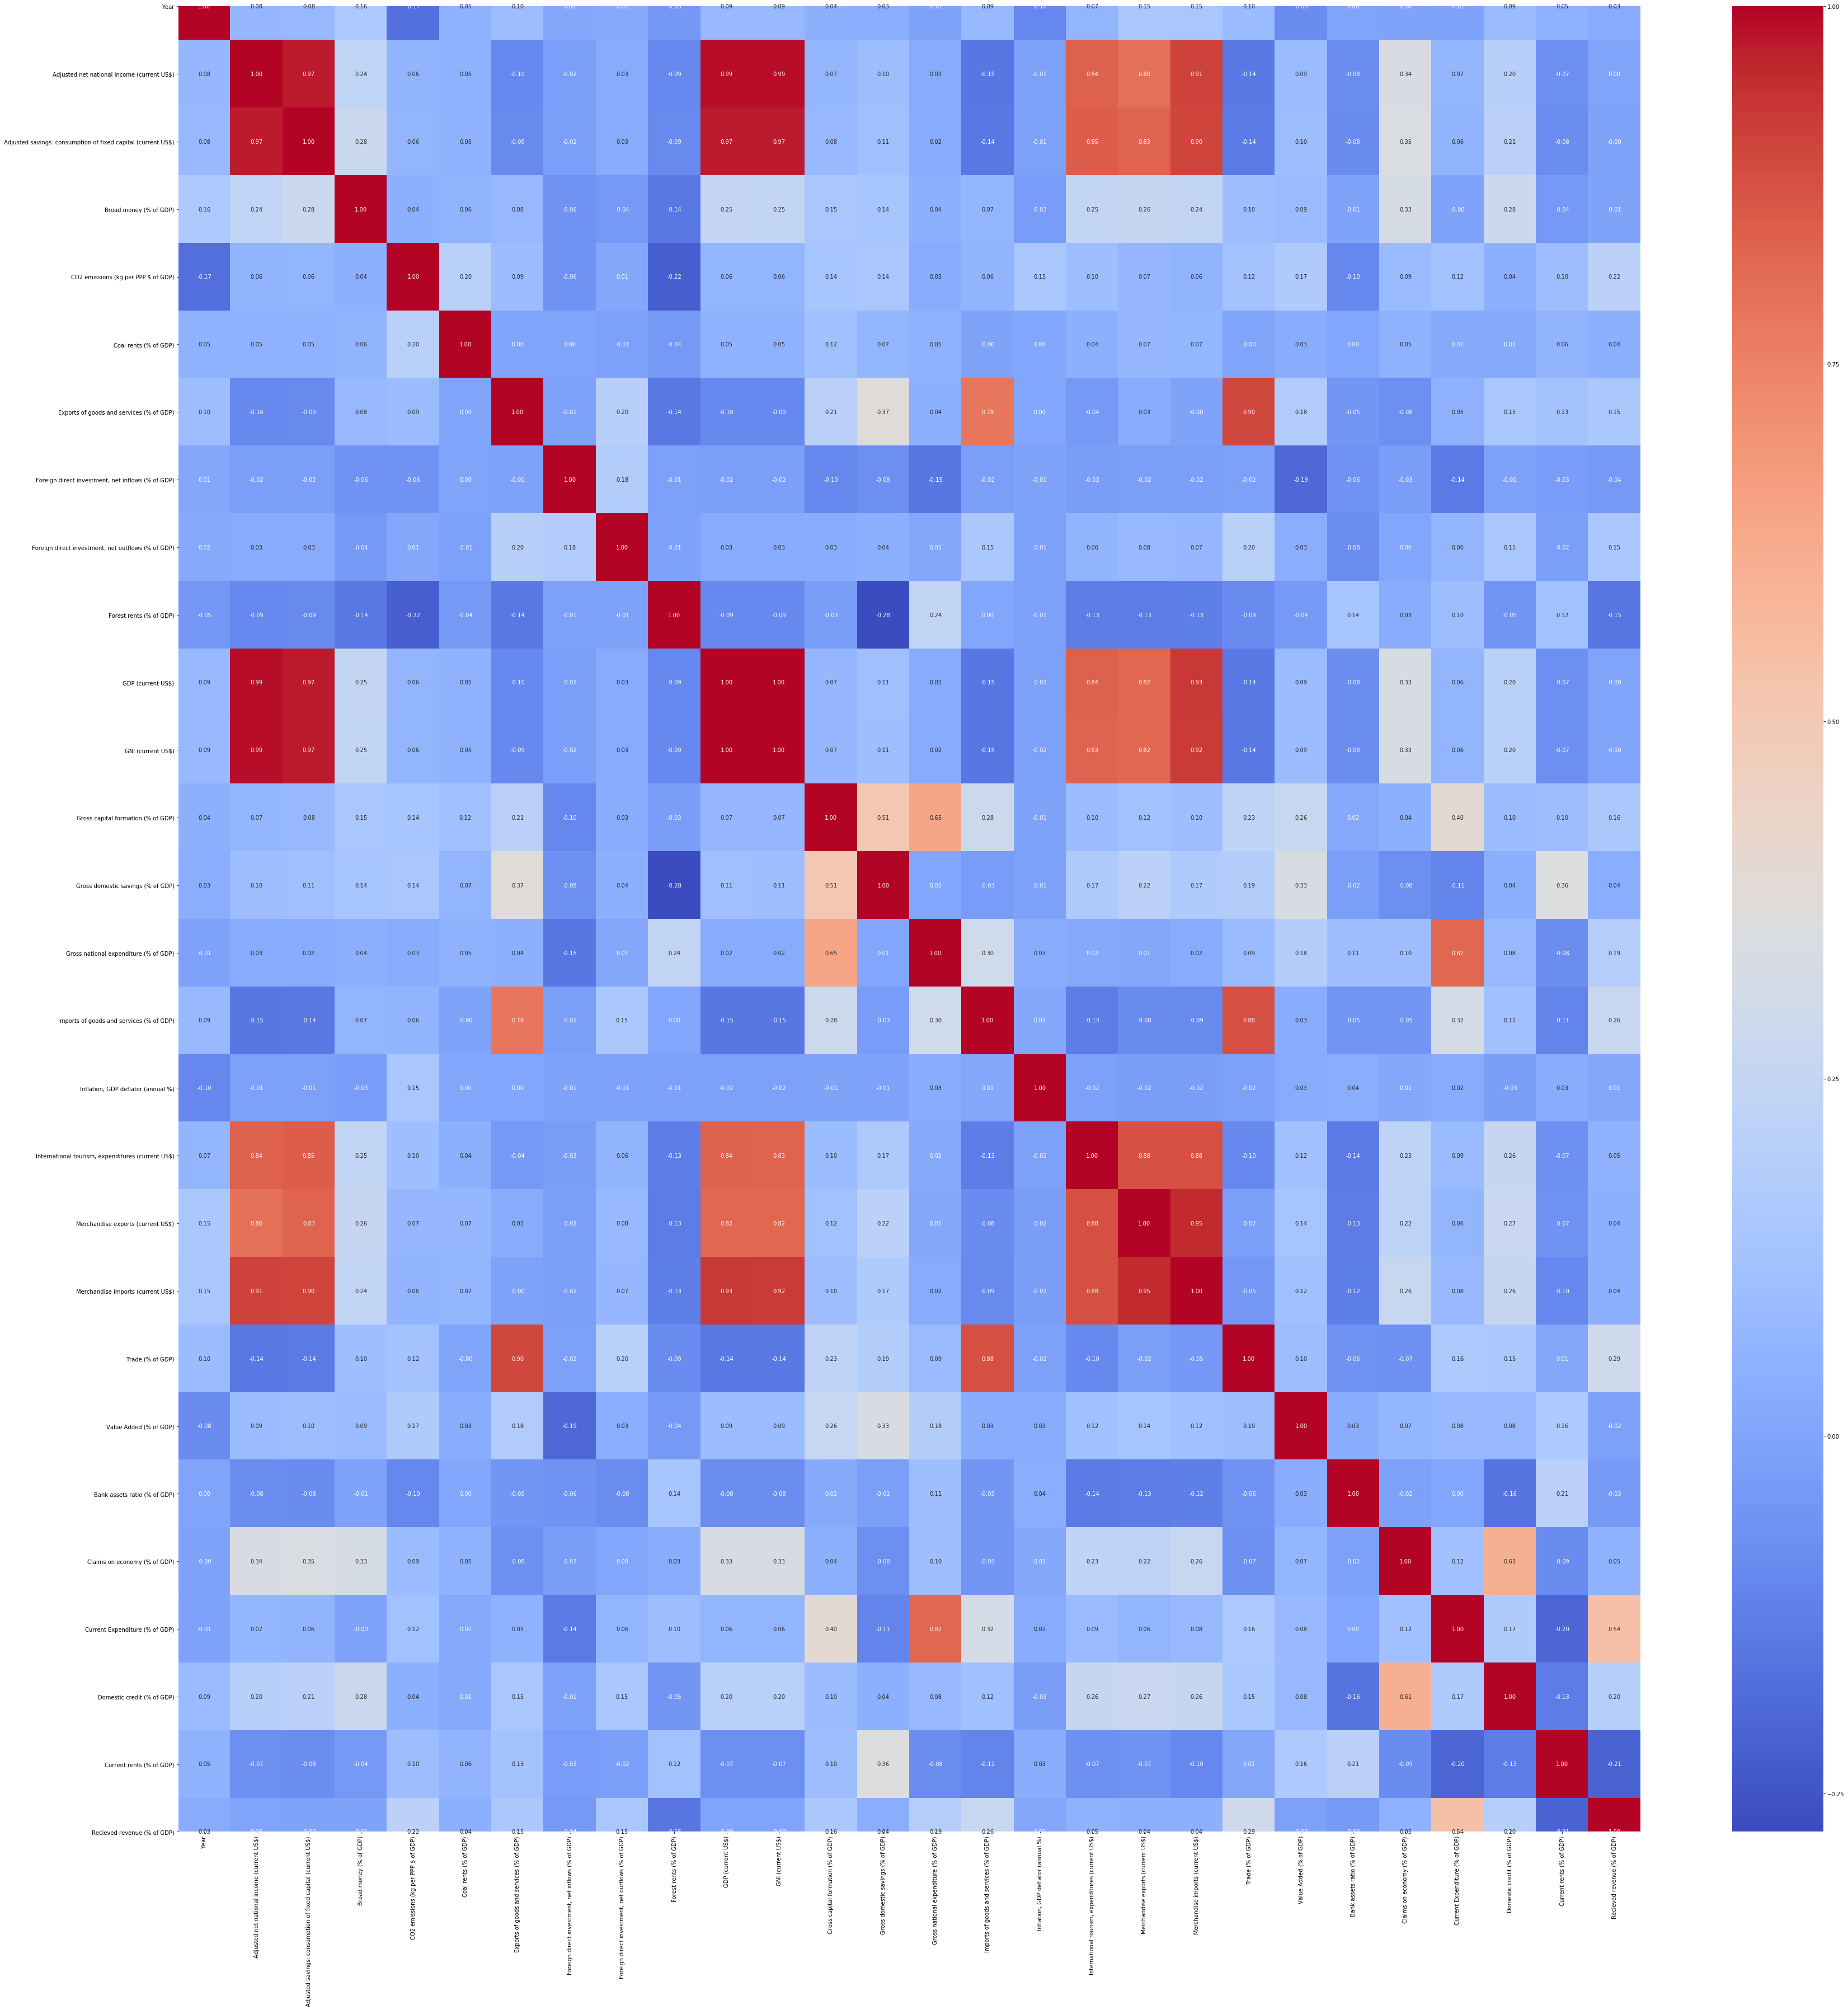

In [25]:
# Co-relation Matrix
plt.figure(figsize=(50,50))
sns.heatmap(data = WoRLD_data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.tight_layout()
plt.show()

From the heatmap above we found few high corelations which can be verified later through scatter plot as well.

### 3.1. Visualtization of attributes for top Countries

We are visualizing some major attributes which we found highly corelated in our heatmap.

Top 10 countries in terms of GDP

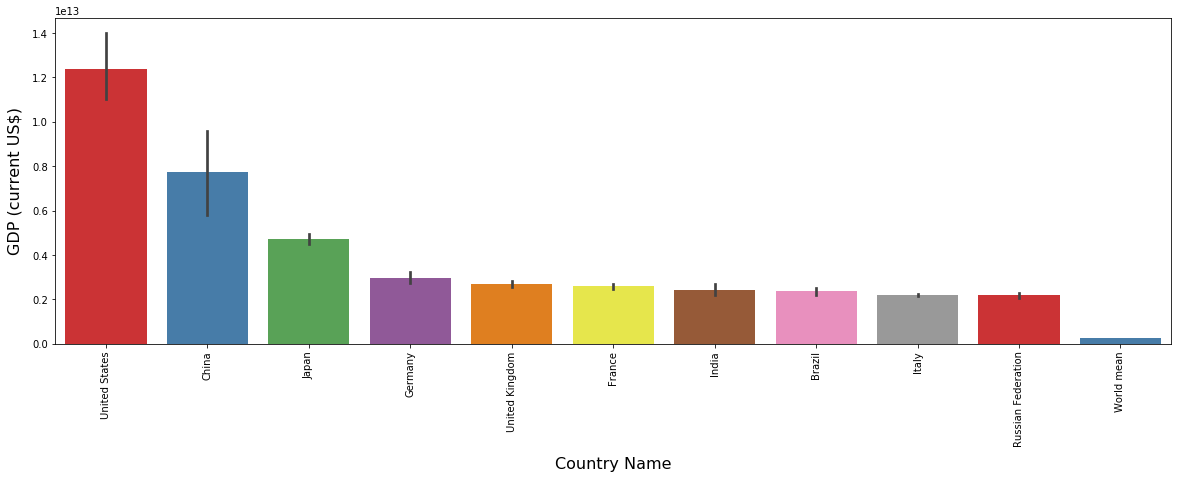

In [26]:
# GDP of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('GDP (current US$)',ascending=False).head(150)
mean = pd.DataFrame({'Country Name':['World mean'], 'GDP (current US$)':[WoRLD_data['GDP (current US$)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','GDP (current US$)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='GDP (current US$)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries with higher Net National Income

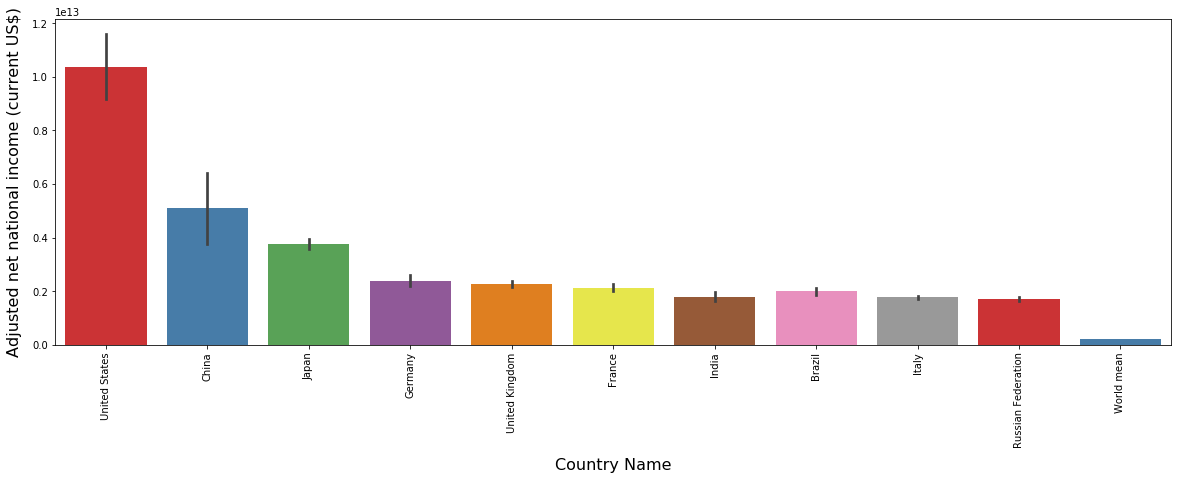

In [27]:
#Net National Income of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Adjusted net national income (current US$)',ascending=False).head(160)
mean = pd.DataFrame({'Country Name':['World mean'], 'Adjusted net national income (current US$)':[WoRLD_data['Adjusted net national income (current US$)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Adjusted net national income (current US$)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Adjusted net national income (current US$)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries with higher Banks Assets Ratio

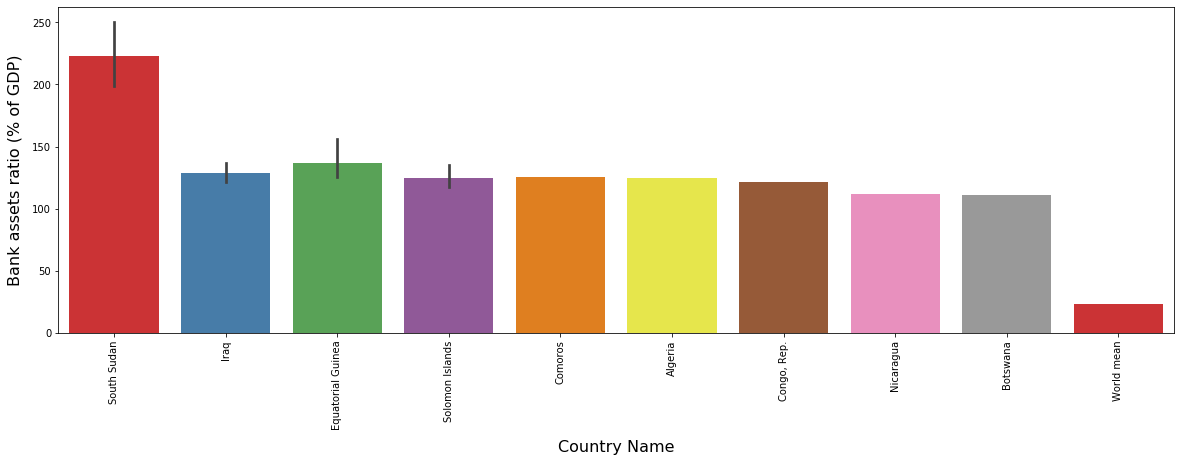

In [28]:
# Banks Assets Ratio of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Bank assets ratio (% of GDP)',ascending=False).head(55)
mean = pd.DataFrame({'Country Name':['World mean'], 'Bank assets ratio (% of GDP)':[WoRLD_data['Bank assets ratio (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Bank assets ratio (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Bank assets ratio (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 Countries with higher claims on economy

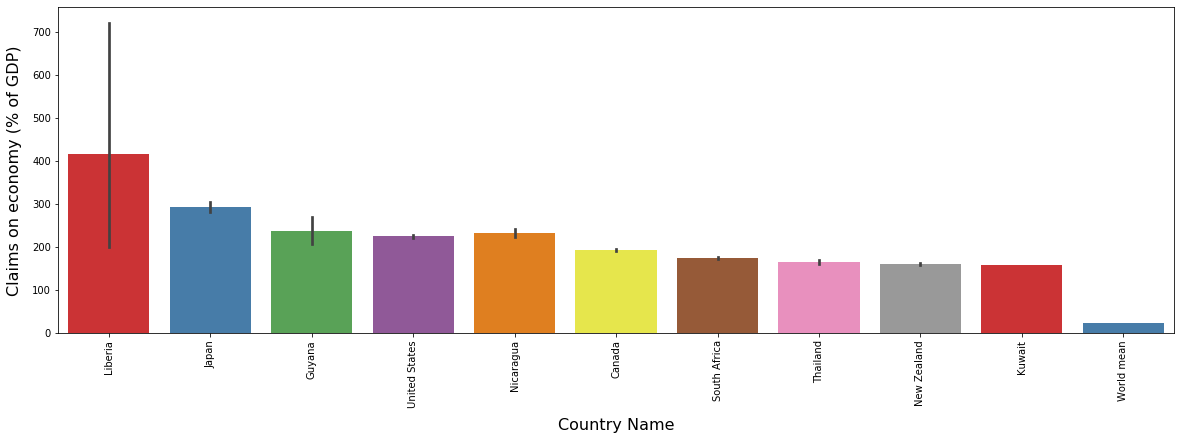

In [29]:
# Net Claims of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Claims on economy (% of GDP)',ascending=False).head(170)
mean = pd.DataFrame({'Country Name':['World mean'], 'Claims on economy (% of GDP)':[WoRLD_data['Claims on economy (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Claims on economy (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Claims on economy (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries with higher Current expenditure

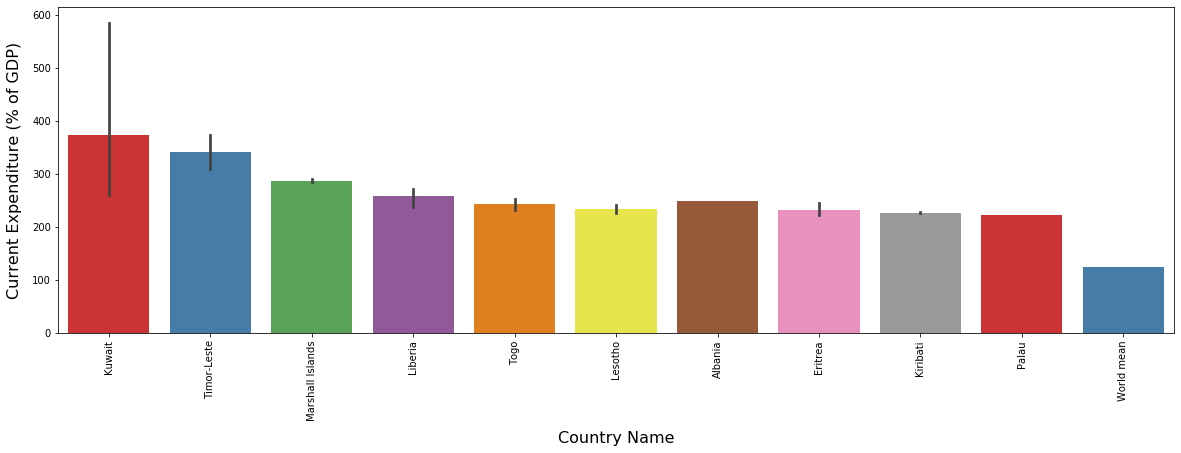

In [30]:
#Mean National Expenditure of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Current Expenditure (% of GDP)',ascending=False).head(80)
mean = pd.DataFrame({'Country Name':['World mean'], 'Current Expenditure (% of GDP)':[WoRLD_data['Current Expenditure (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Current Expenditure (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Current Expenditure (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries with higher Domestic Credit

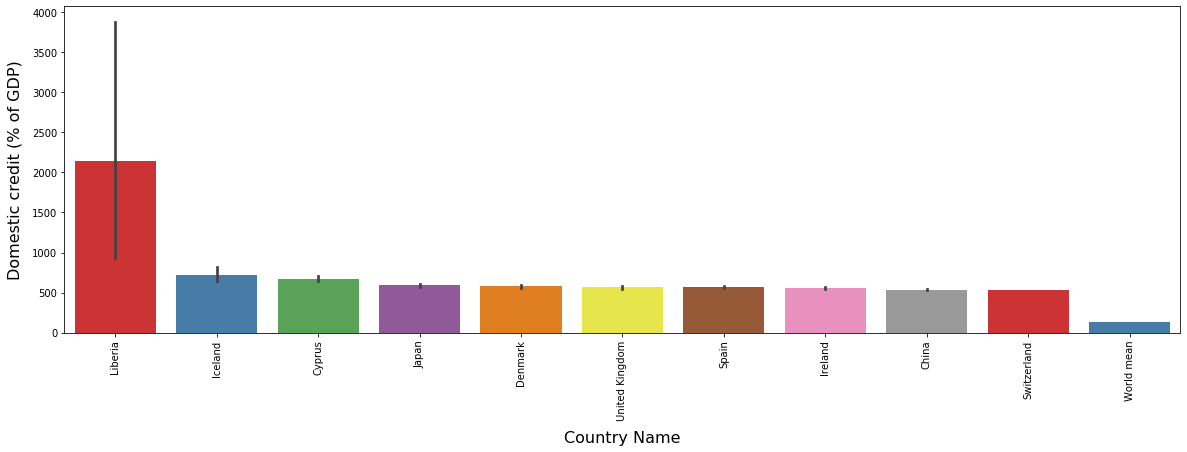

In [31]:
#Mean Domestic Credit of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Domestic credit (% of GDP)',ascending=False).head(90)
mean = pd.DataFrame({'Country Name':['World mean'], 'Domestic credit (% of GDP)':[WoRLD_data['Domestic credit (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Domestic credit (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Domestic credit (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries with higher Current rents

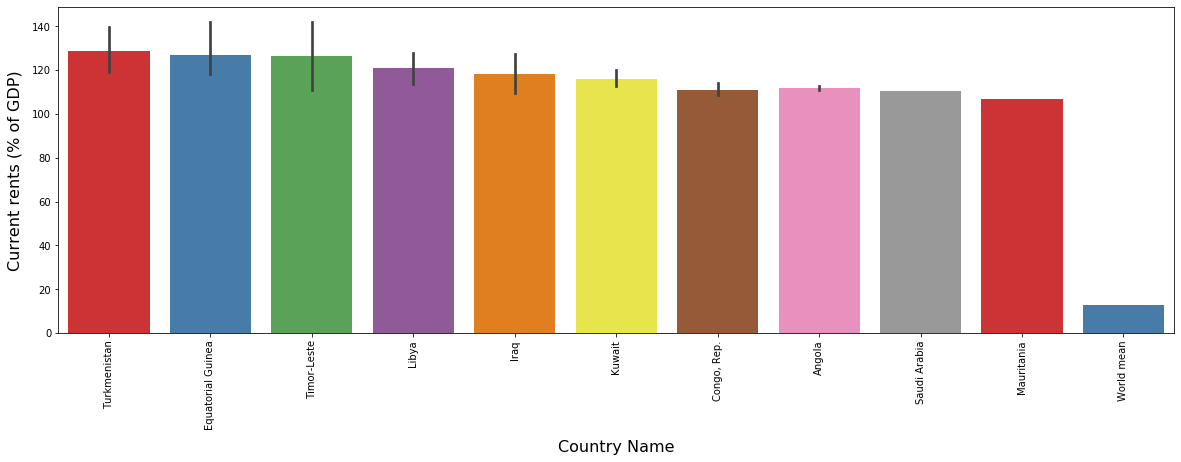

In [32]:
#Mean Current Rents of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Current rents (% of GDP)',ascending=False).head(50)
mean = pd.DataFrame({'Country Name':['World mean'], 'Current rents (% of GDP)':[WoRLD_data['Current rents (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Current rents (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Current rents (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Top 10 countries who recieved higher revenue

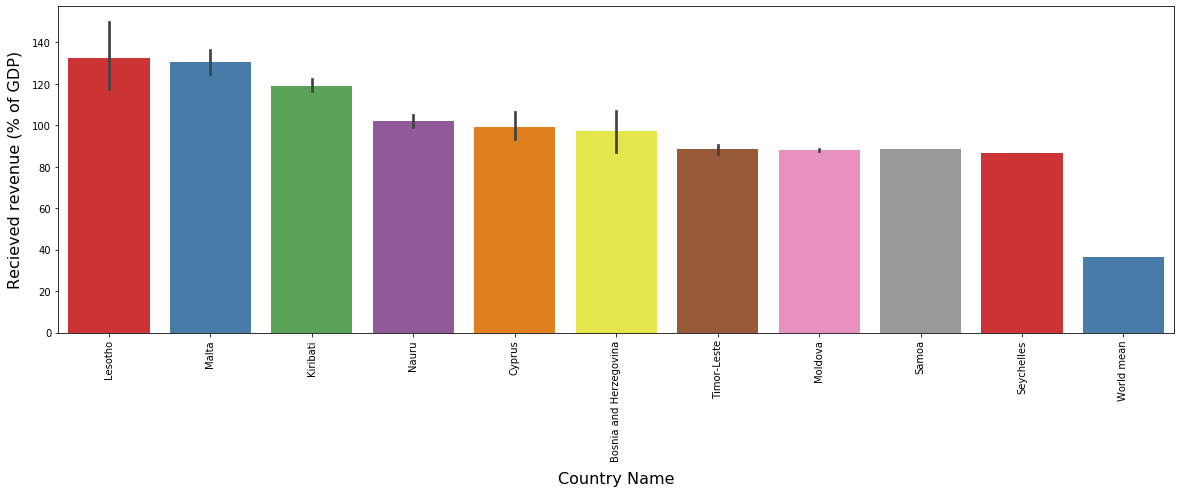

In [33]:
#Mean Recieved Revenue of top 10 coutries in descending order along with World Mean

fig, ax = plt.subplots(figsize=(20,6))
top_gdp_countries = WoRLD_data.sort_values('Recieved revenue (% of GDP)',ascending=False).head(110)
mean = pd.DataFrame({'Country Name':['World mean'], 'Recieved revenue (% of GDP)':[WoRLD_data['Recieved revenue (% of GDP)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country Name','Recieved revenue (% of GDP)']],mean],ignore_index=True)
sns.barplot(x='Country Name', y='Recieved revenue (% of GDP)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=10)
ax.set_ylabel(ax.get_ylabel(), labelpad=10)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### 3.2. Scatter plots showing corelation between different attributes

Scatter plot showing top 6 corelated attributes with the input. Further we would be picking only the ones having corelation above 0.8 i.e 80%.

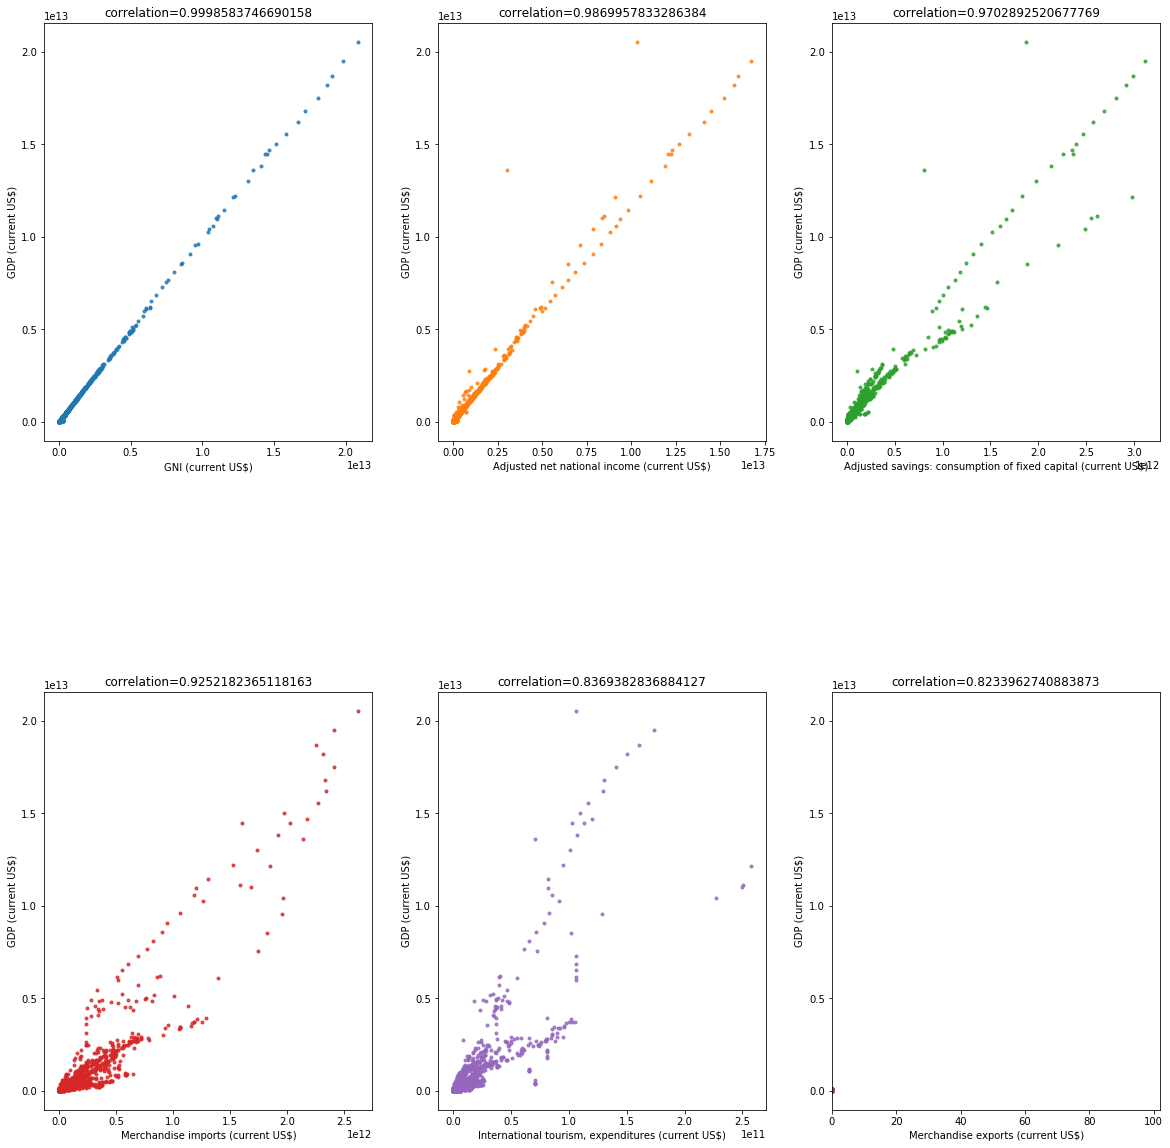

In [34]:
# Corelation of GDP with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='GDP (current US$)':
        corr_to_gdp[col] = WoRLD_data['GDP (current US$)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP (current US$)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the GDP is corelated to below attributes with corelation factor as below:

    GDP with GNI --> 0.99
    
    GDP with Adjusted NNI --> 0.98
    
    GDP with Consumption of fixed capital --> 0.97
    
    GDP with Merchandise import --> 0.92
    
    GDP with International tourism --> 0.83

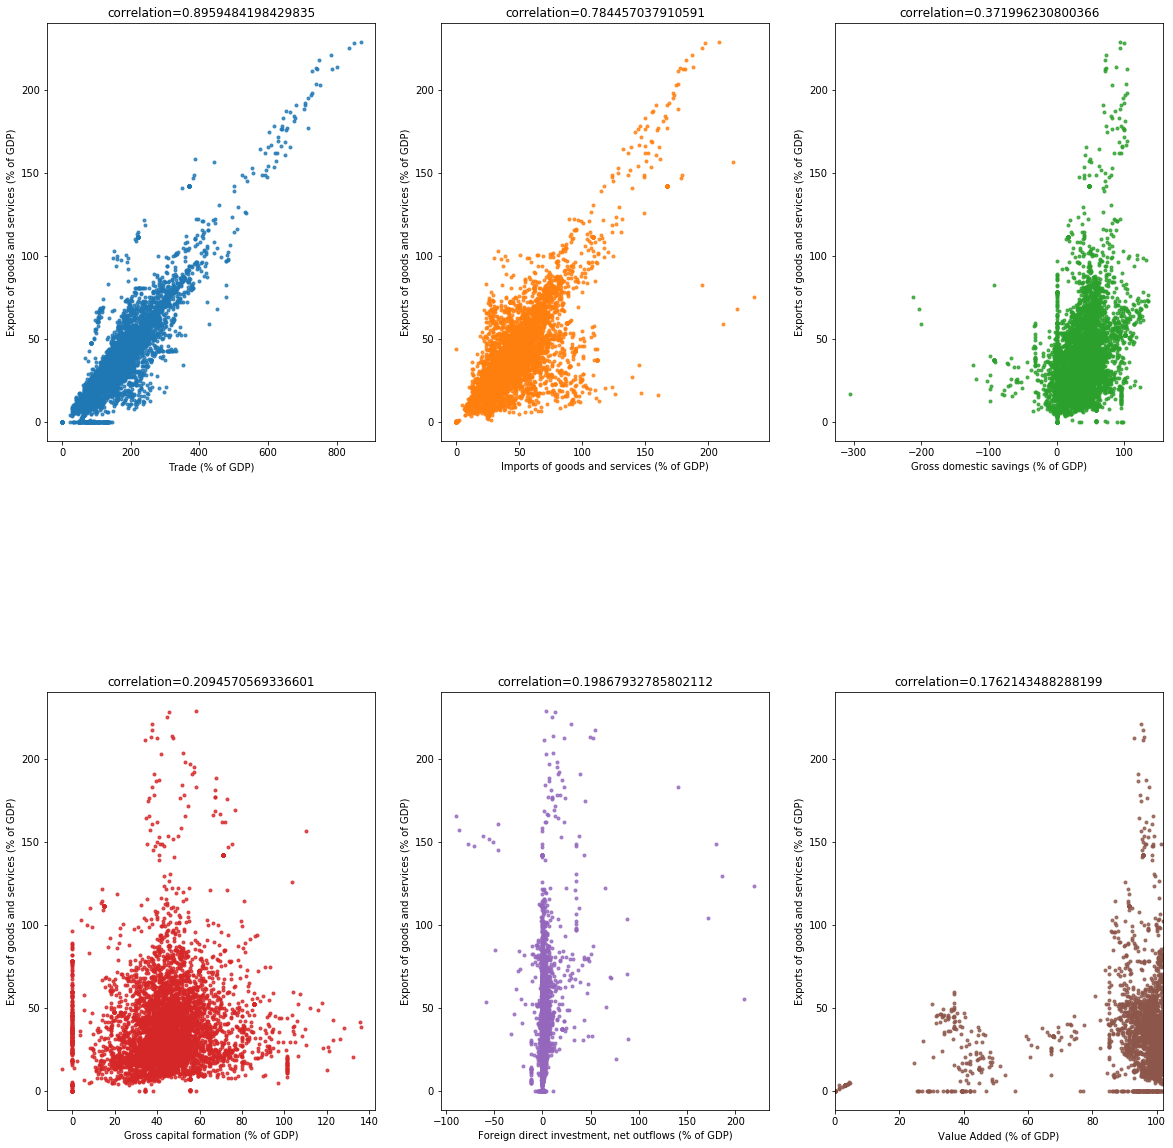

In [35]:
# Corelation of Exports of goods and services with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='Exports of goods and services (% of GDP)':
        corr_to_gdp[col] = WoRLD_data['Exports of goods and services (% of GDP)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Exports of goods and services (% of GDP)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the Exports of Goods and Service is corelated to below attributes with corelation factor as below:

    Export with Trade --> 0.89

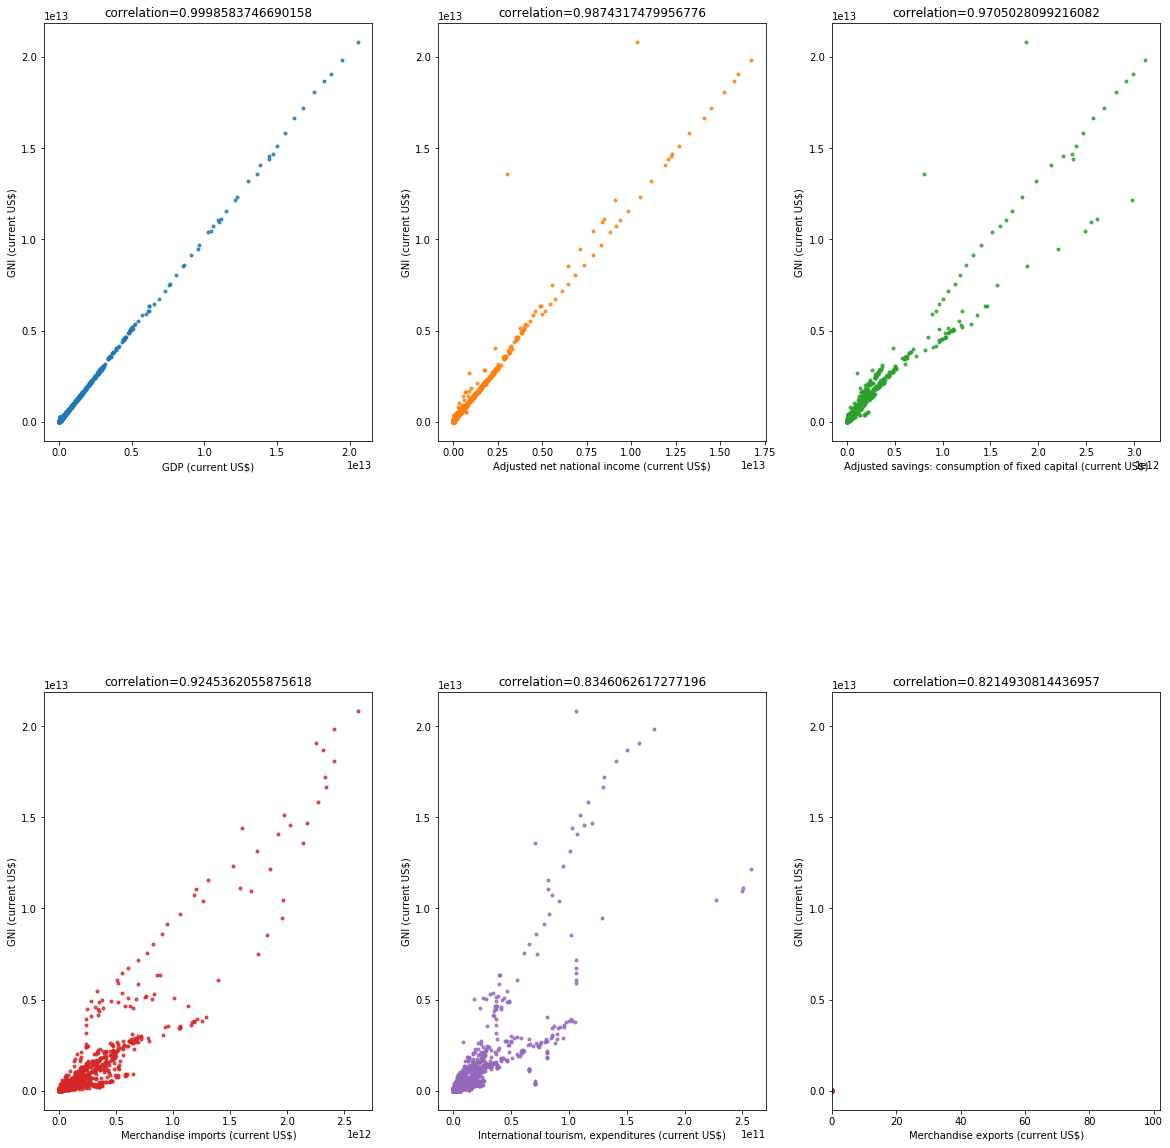

In [36]:
# Corelation of GNI with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='GNI (current US$)':
        corr_to_gdp[col] = WoRLD_data['GNI (current US$)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GNI (current US$)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the GNI is corelated to below attributes with corelation factor as below:

    GNI with GNI --> 0.99
    
    GNI with Adjusted NNI --> 0.98
    
    GNI with Consumption of fixed capital --> 0.97
    
    GNI with Merchandise import --> 0.92
    
    GNI with International tourism --> 0.83

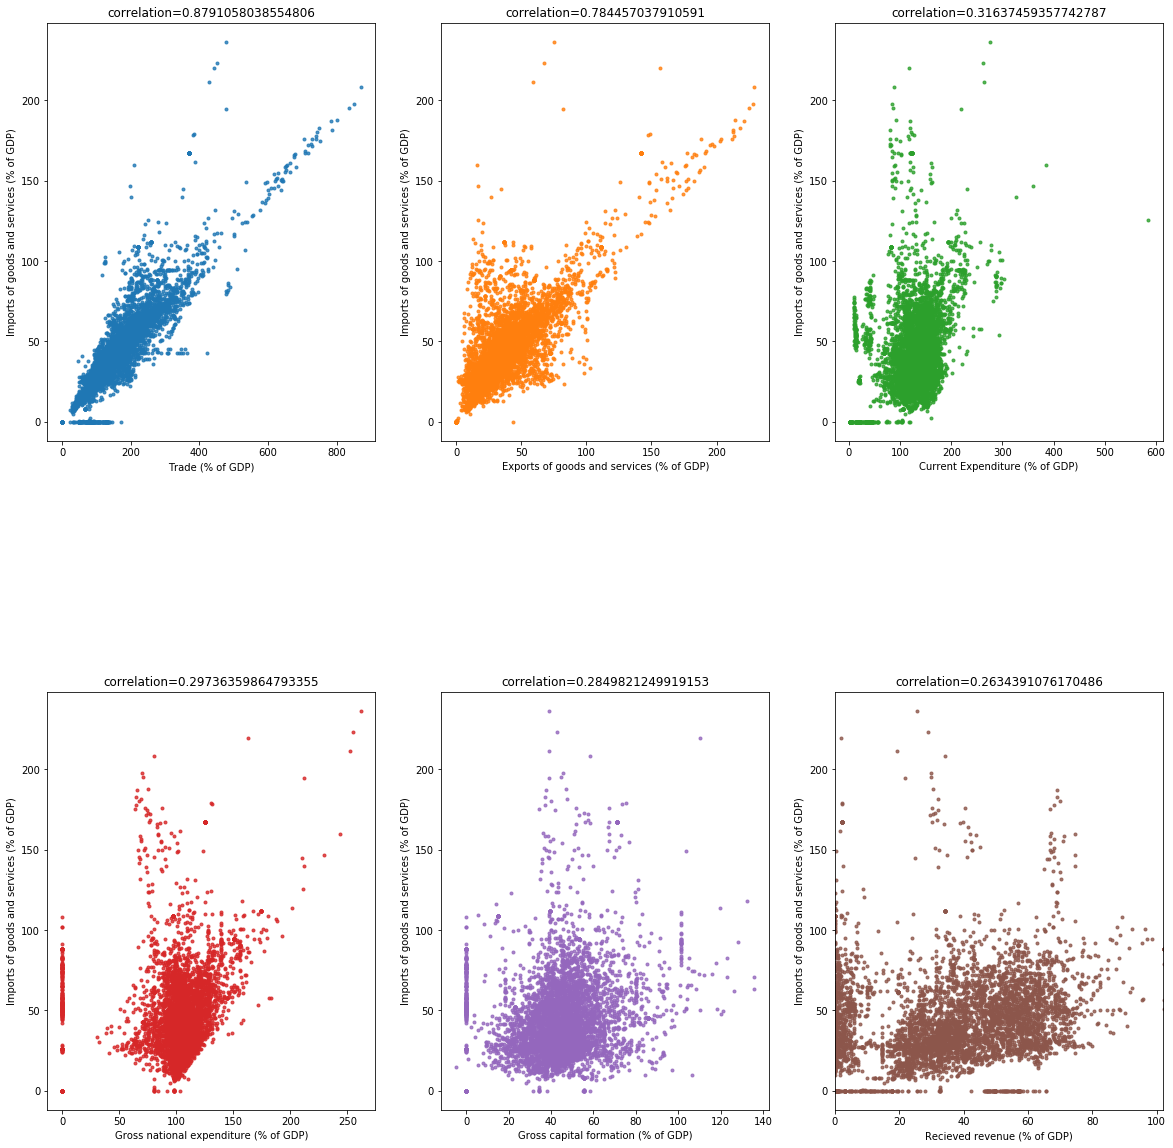

In [37]:
# Corelation of Imports of goods and services with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='Imports of goods and services (% of GDP)':
        corr_to_gdp[col] = WoRLD_data['Imports of goods and services (% of GDP)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Imports of goods and services (% of GDP)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the Imports of Goods and Service is corelated to below attributes with corelation factor as below:

    Import with Trade --> 0.87

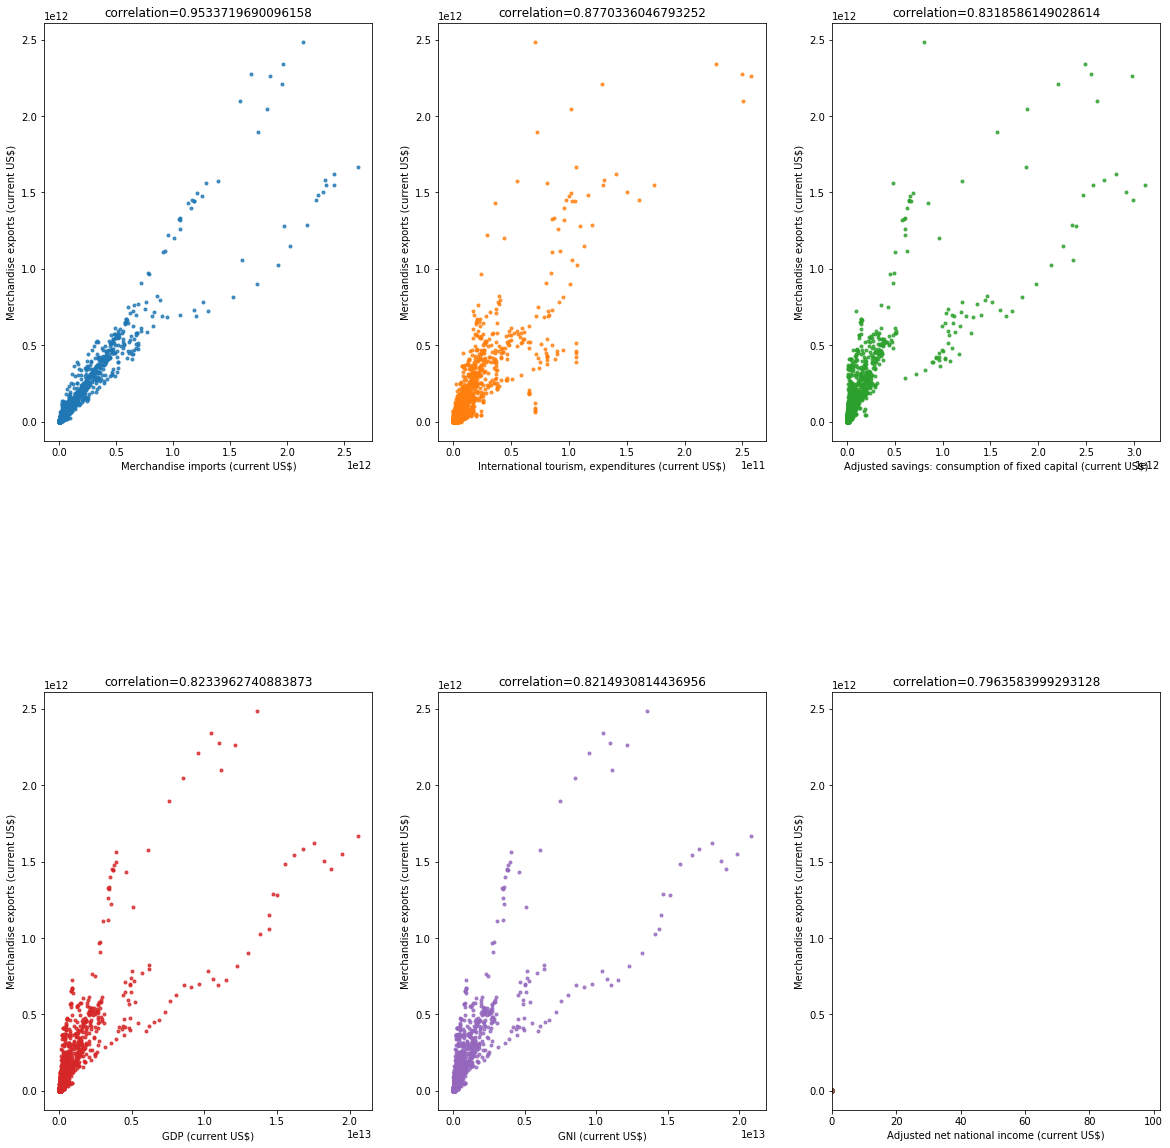

In [38]:
# Corelation of Merchandise exports with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='Merchandise exports (current US$)':
        corr_to_gdp[col] = WoRLD_data['Merchandise exports (current US$)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Merchandise exports (current US$)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the Merchandise exports is corelated to below attributes with corelation factor as below:
    
    Exports with Merchandise import --> 0.95
    
    Exports with International tourism --> 0.87
    
    Exports with Fixed Capital --> 0.83
    
    Exports with GDP --> 0.82
    
    Exports with GNI --> 0.82

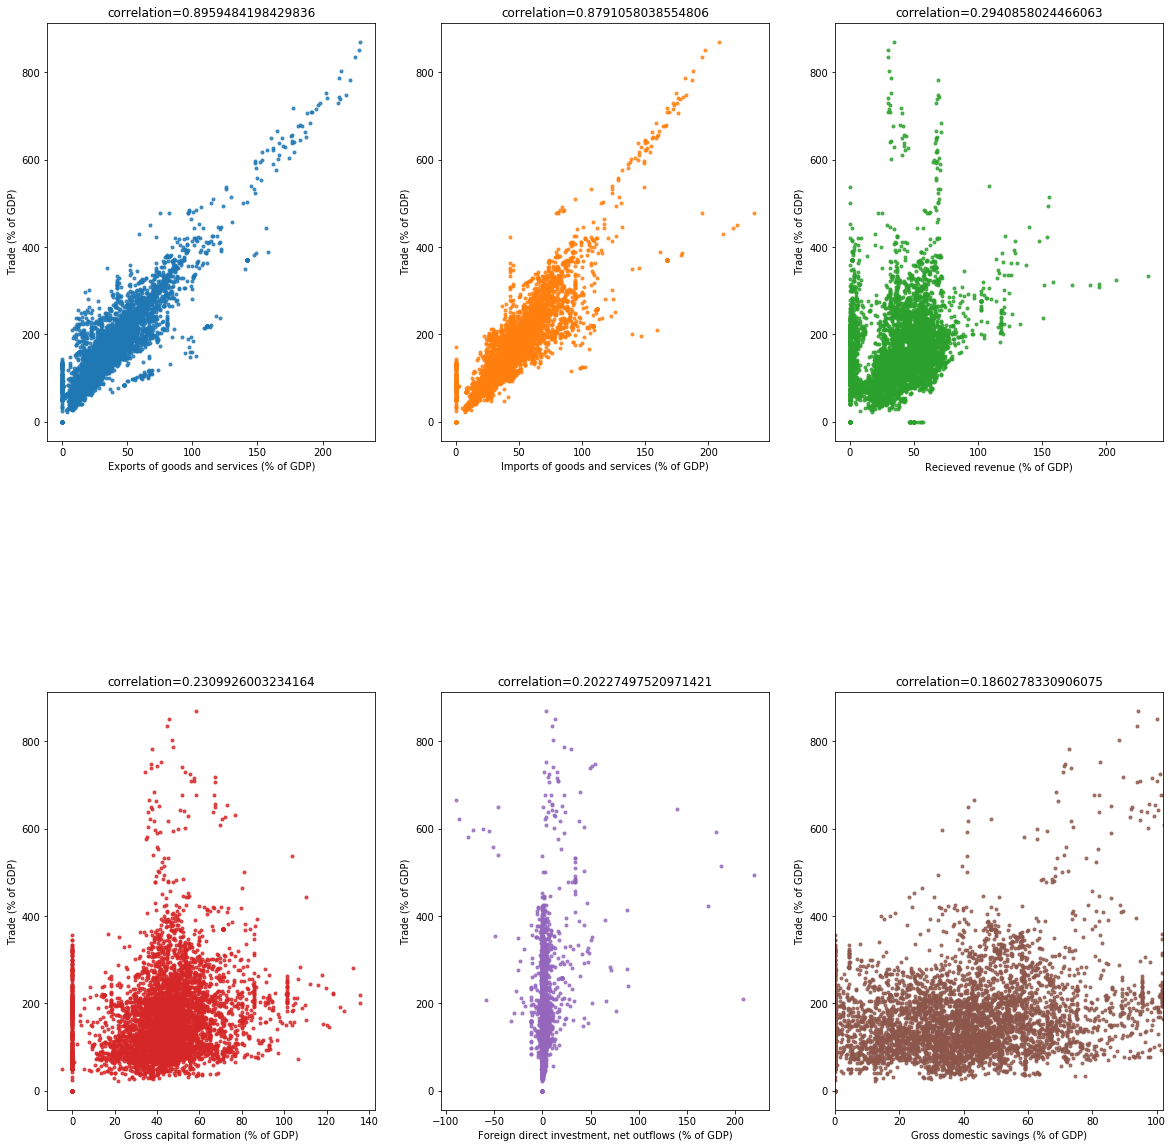

In [39]:
# Corelation of Trade with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='Trade (% of GDP)':
        corr_to_gdp[col] = WoRLD_data['Trade (% of GDP)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Trade (% of GDP)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the Trade is corelated to below attributes with corelation factor as below:
    
    Trade with Export of Goods and Services --> 0.89
    
    Trade with Import of Goods and Services --> 0.87


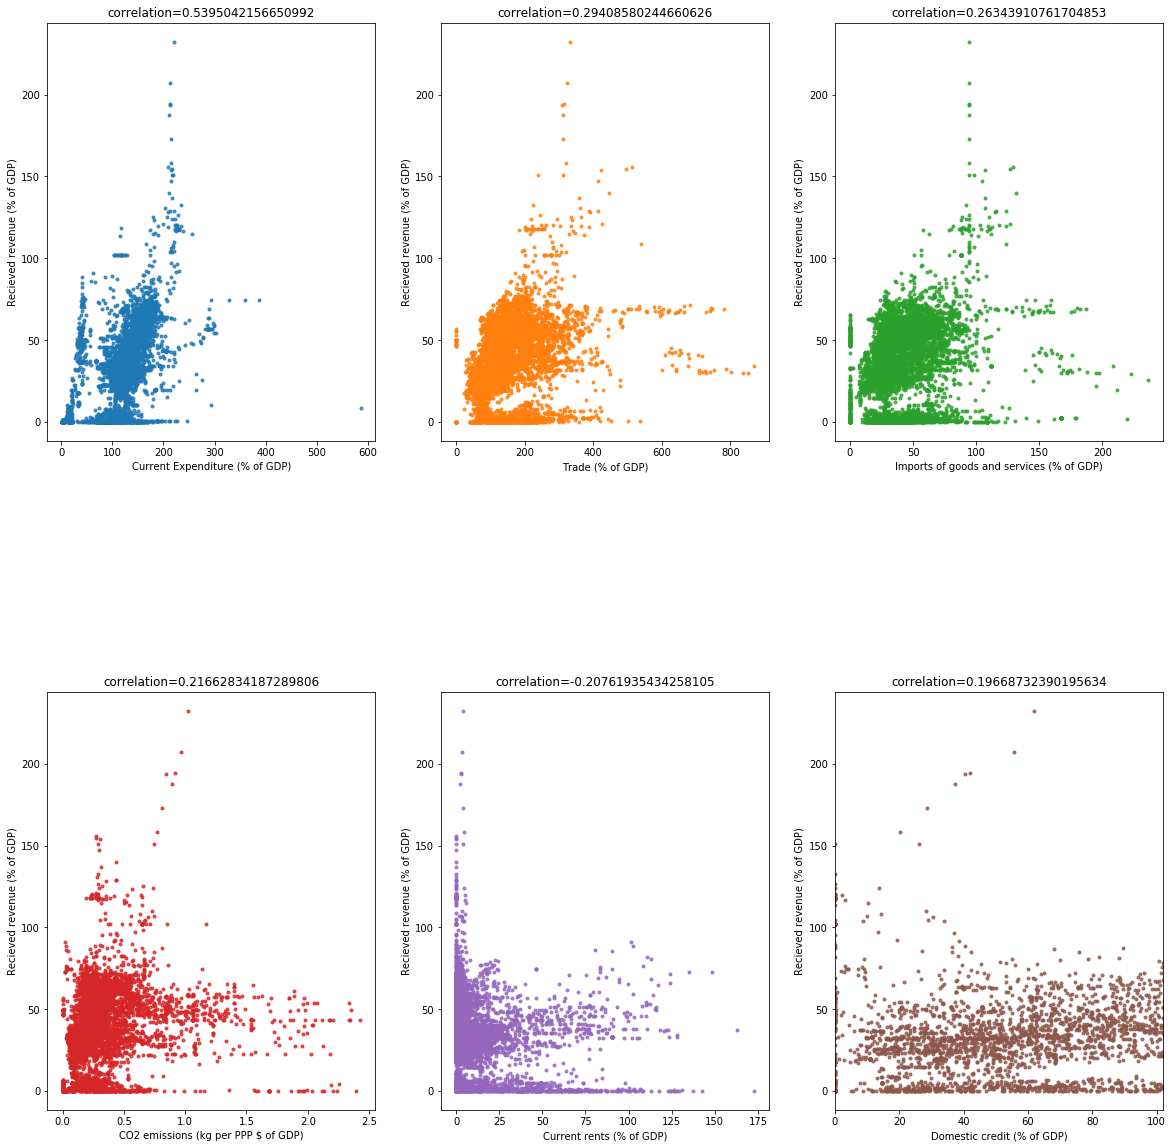

In [40]:
# Corelation of Recieved Revenue with other attributes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.6)

corr_to_gdp = pd.Series()
for col in WoRLD_data.columns.values[2:]:
    if col!='Recieved revenue (% of GDP)':
        corr_to_gdp[col] = WoRLD_data['Recieved revenue (% of GDP)'].corr(WoRLD_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Recieved revenue (% of GDP)', data=WoRLD_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

By observing the Scatter plot we can see that the Recieved Revenue is lightly corelated to attributes but they doesnt fall under our threshold so skipping them.

### 4. Modelling

##### 4.1. Single Linear Regression Model

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too.

Copying dataset to be used for analysis.

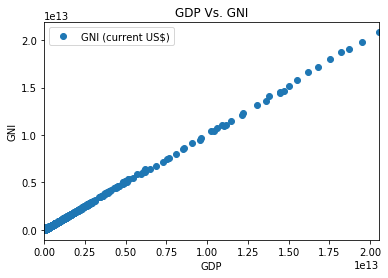

In [41]:
dataset = WoRLD_data.copy()
dataset.plot(x='GDP (current US$)', y='GNI (current US$)', style='o')  
plt.title('GDP Vs. GNI')  
plt.xlabel('GDP')  
plt.ylabel('GNI')  
plt.show()

Selecting attributes :

In [42]:
X = dataset['GDP (current US$)'].values.reshape(-1,1)
y = dataset['GNI (current US$)'].values.reshape(-1,1)

Selecting test and training data for modelling:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Performing regressiona and fitting it.

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-2.50191531e+09]
[[1.01101908]]


Predicting values from the model:

In [46]:
y_pred = regressor.predict(X_test)

Dataframe mformation to compare with actual and predicted value from model: 

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

Actual        Predicted
0    1213893813.04    -736622669.63
1    6321779211.00    3898313792.09
2  667646000000.00  698546804409.50
3   78019902501.00   77648304765.40
4 7481120000000.00 7632208683570.12

Plotting Actual vs Predicted plot:

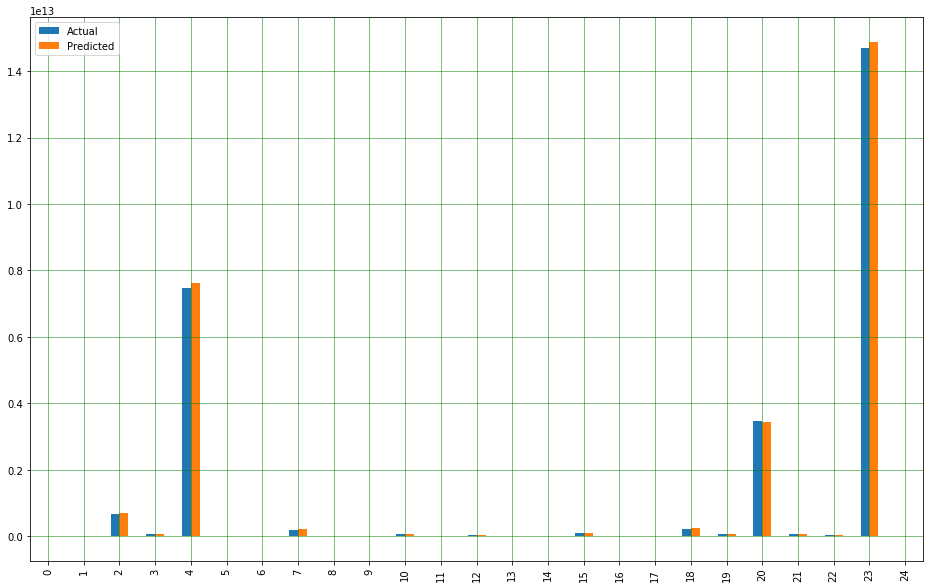

In [48]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

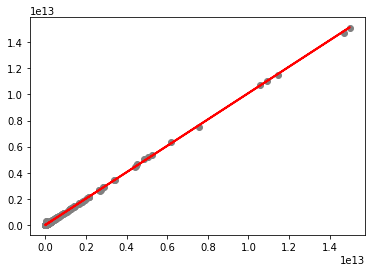

In [49]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Printing Accuracy and Errors:

In [50]:
print("Accuracy of Single Linear Regression is:", regressor.score(X_test,y_test))

Accuracy of Single Linear Regression is: 0.9997341794552852


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6135536198.336899
Mean Squared Error: 2.782001555332744e+20
Root Mean Squared Error: 16679333186.11012


This means that our algorithm was not very accurate but can still make reasonably good predictions.

#### 4.2. MultiVariate Linear Regression

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too.

Copying dataset to be used for analysis.

Selecting attributes :

In [52]:
dataset = WoRLD_data.copy()

#Selecting attributes
X = dataset[['Adjusted net national income (current US$)',
             'Adjusted savings: consumption of fixed capital (current US$)',
             'GNI (current US$)',
             'International tourism, expenditures (current US$)',
             'Merchandise imports (current US$)']].values
y = dataset['GDP (current US$)'].values

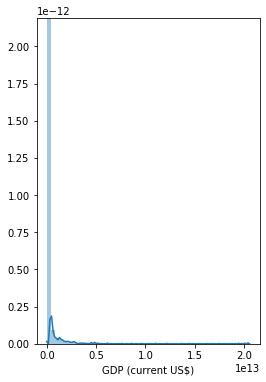

In [53]:
plt.figure(figsize=(4,6))
plt.tight_layout()
seabornInstance.distplot(dataset['GDP (current US$)'])

Selecting test and training data for modelling:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Performing regression and fitting it.

In [55]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1409933595.8277588
[-0.02296881 -0.01182574  1.00235298  0.94217591 -0.02510009]


Predicting values from the model:

In [57]:
y_pred = regressor.predict(X_test)

Dataframe mformation to compare with actual and predicted value from model: 

In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(50)
df.head(5)

Actual        Predicted
0    1746052739.81    2604682261.45
1    6330473097.00    7673554985.29
2  693408000000.00  669042680088.13
3   79276664000.00   78322486275.79
4 7551500000000.00 7378890193145.98

Plotting Actual vs Predicted plot:

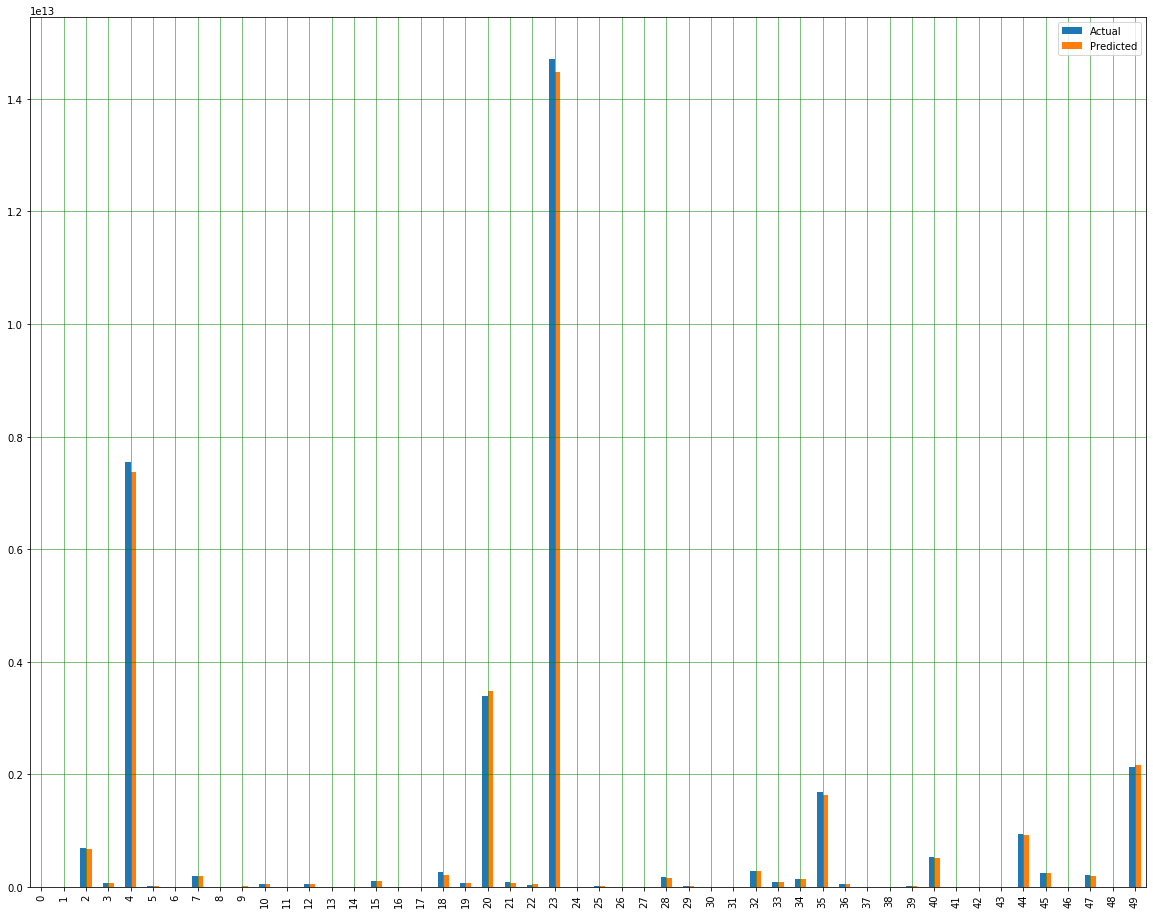

In [59]:
df1.plot(kind='bar',figsize=(20,16))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Printing Accuracy and Errors:

In [60]:
print("Accuracy of Multi Linear Regression is:", regressor.score(X_test,y_test))

Accuracy of Multi Linear Regression is: 0.9996940874210041


In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5939323690.464933
Mean Squared Error: 3.151421943522434e+20
Root Mean Squared Error: 17752244769.387432


#### 4.3. Multivariate Linear Regression with LabelEncoder

Selecting attributes :

In [62]:
data = WoRLD_data.copy()
LE = LabelEncoder()
data['GDP'] = LE.fit_transform(data['GDP (current US$)'])
data['GNI'] = LE.fit_transform(data['GNI (current US$)'])
data.head(5)

Country Name Country Code  Year  Adjusted net national income (current US$)  \
0  Afghanistan          AFG  1990                              15989594152.44   
1  Afghanistan          AFG  1991                              15989594152.44   
2  Afghanistan          AFG  1992                              15989594152.44   
3  Afghanistan          AFG  1993                              15989594152.44   
4  Afghanistan          AFG  1994                              15989594152.44   

   Adjusted savings: consumption of fixed capital (current US$)  \
0                                      1645007932.56              
1                                      1645007932.56              
2                                      1645007932.56              
3                                      1645007932.56              
4                                      1645007932.56              

   Broad money (% of GDP)  CO2 emissions (kg per PPP $ of GDP)  \
0                   32.25                                 0.12   
1                   32.25                                 0.12   
2                   32.25                                 0.12   
3                   32.25                                 0.12   
4                   32.25                                 0.12   

   Coal rents (% of GDP)  Exports of goods and services (% of GDP)  \
0                   0.16                                     21.81   
1                   0.16                                     21.81   
2                   0.16                                     21.81   
3                   0.16                                     21.81   
4                   0.16                                     21.81   

   Foreign direct investment, net inflows (% of GDP)  ...  Trade (% of GDP)  \
0                                               1.25  ...            139.86   
1                                               1.25  ...            139.86   
2                                               1.25  ...            139.86   
3                                               1.25  ...            139.86   
4                                               1.25  ...            139.86   

   Value Added (% of GDP)  Bank assets ratio (% of GDP)  \
0                  111.01                         66.55   
1                  111.01                         66.55   
2                  111.01                         66.55   
3                  111.01                         66.55   
4                  111.01                         66.55   

   Claims on economy (% of GDP)  Current Expenditure (% of GDP)  \
0                         -6.66                          183.71   
1                         -6.66                          183.71   
2                         -6.66                          183.71   
3                         -6.66                          183.71   
4                         -6.66                          183.71   

   Domestic credit (% of GDP)  Current rents (% of GDP)  \
0                       11.02                      0.64   
1                       11.02                      0.64   
2                       11.02                      0.64   
3                       11.02                      0.64   
4                       11.02                      0.64   

   Recieved revenue (% of GDP)   GDP   GNI  
0                        19.46  2661  2773  
1                        19.46  2661  2773  
2                        19.46  2661  2773  
3                        19.46  2661  2773  
4                        19.46  2661  2773  

[5 rows x 32 columns]

Selecting test and training data for modelling:

In [63]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Adjusted net national income (current US$)',
             'Adjusted savings: consumption of fixed capital (current US$)',
             'Broad money (% of GDP)',
             'Exports of goods and services (% of GDP)',
             'Gross capital formation (% of GDP)',
             'GNI (current US$)',
             'Gross national expenditure (% of GDP)',
             'Imports of goods and services (% of GDP)',
             'International tourism, expenditures (current US$)',
             'Trade (% of GDP)',
             'Value Added (% of GDP)',
             'Bank assets ratio (% of GDP)',
             'Claims on economy (% of GDP)',
             'Current Expenditure (% of GDP)',
             'Recieved revenue (% of GDP)',
             'Merchandise imports (current US$)']
target = 'GDP (current US$)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

Performing regression and fitting it.

In [64]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting values from the model:

In [65]:
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)


Dataframe mformation to compare with actual and predicted value from model: 

In [66]:
df = pd.DataFrame({'Actual': test_Y, 'Predicted': test_pred_Y})
df.head(5)

Actual       Predicted
4289   6176312552.00   7899903661.49
189  198737000000.00 178272445869.98
3450  59977326086.00  63127881700.83
4188    584706020.20   1859992849.66
2526  16870817135.00  17418606671.12

Plotting Actual vs Predicted plot:

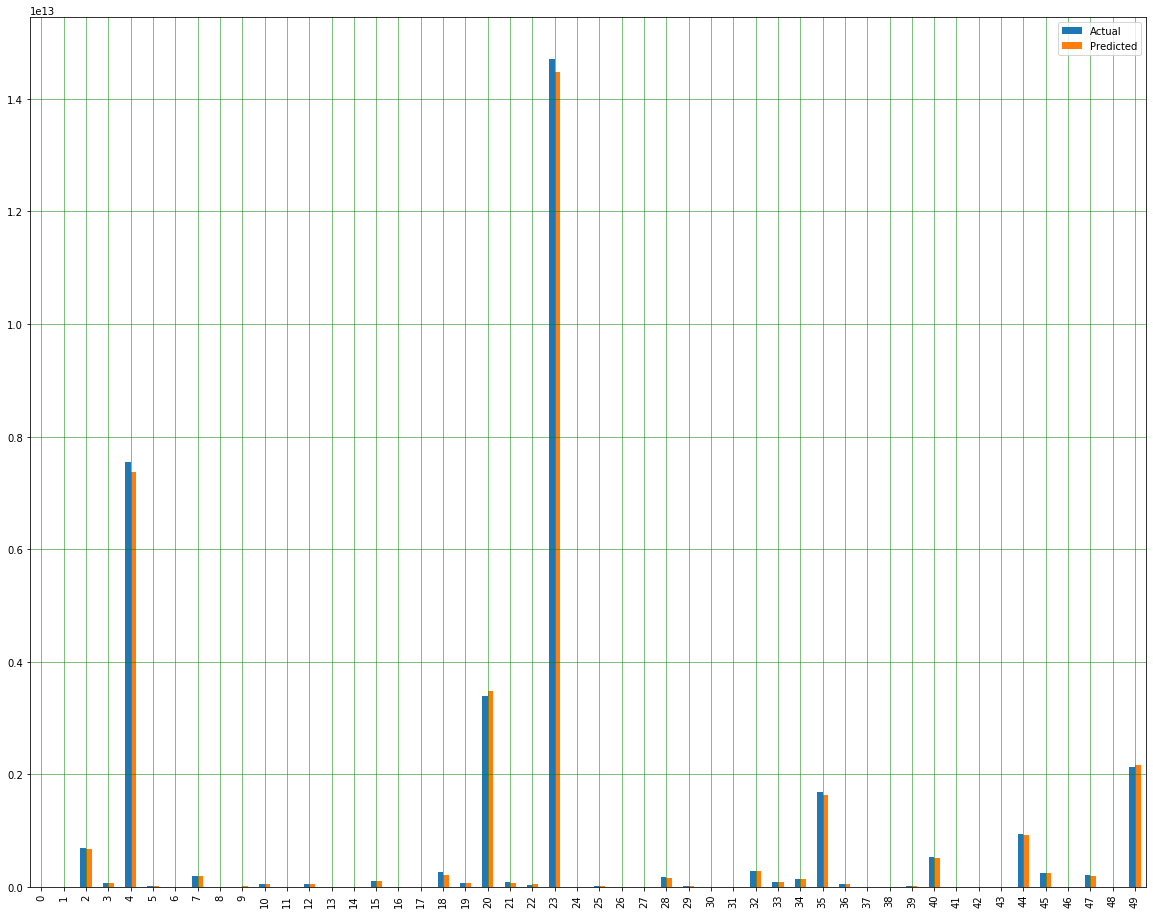

In [67]:
df1.plot(kind='bar',figsize=(20,16))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Printing Accuracy and Errors:

In [68]:
print("Accuracy of Multi Linear Regression with Label Encoder is:", model.score(test_X, test_Y))

Accuracy of Multi Linear Regression with Label Encoder is: 0.9996213696631054


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, test_pred_Y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, test_pred_Y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))

Mean Absolute Error: 6565461412.525408
Mean Squared Error: 4.407093817791699e+20
Root Mean Squared Error: 20993079378.194374


#### 4.4. Random Forest Model

Though Random forest is used for classification problem only but we used it here as sklearn provides it for regession as well.

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:

-- Random sampling of training data points when building trees
 
-- Random subsets of features considered when splitting nodes

Selecting test and training data for modelling:

In [70]:
data = WoRLD_data.copy()
X = data[['Adjusted net national income (current US$)',
             'Adjusted savings: consumption of fixed capital (current US$)',
             'Broad money (% of GDP)',
             'GNI (current US$)',
             'International tourism, expenditures (current US$)',
             'Merchandise imports (current US$)']]
X.shape

(5559, 6)

In [71]:
Y = data[['GDP (current US$)',
             'Exports of goods and services (% of GDP)',
             'Gross capital formation (% of GDP)',
             'Imports of goods and services (% of GDP)',
             'International tourism, expenditures (current US$)',
             'Trade (% of GDP)']]
Y.shape

(5559, 6)

In [72]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

Performing regression and fitting it.

In [73]:
regr_1 = RandomForestRegressor(n_estimators=500, min_samples_leaf=1)
regr_2 = RandomForestRegressor()
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Predicting values from the model:

In [74]:
y_pred = regr_1.predict(X_test)

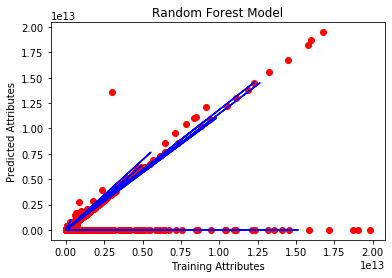

In [75]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_test, regr_1.predict(X_test), color = 'blue')
plt.title('Random Forest Model')
plt.xlabel('Training Attributes')
plt.ylabel('Predicted Attributes')
plt.show()

Printing Accuracy and Errors:

In [76]:
print("Accuracy of Random Forest with estimator 500 is:", regr_1.score(X_val,Y_val))

print("Accuracy of Random Forest with normal regression is:", regr_2.score(X_val,Y_val))

Accuracy of Random Forest with estimator 500 is: 0.9832086241794884
Accuracy of Random Forest with normal regression is: 0.9853777783774029


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_val, y_pred)))

Mean Absolute Error: 82692123488.42972
Mean Squared Error: 5.380050939405705e+23
Root Mean Squared Error: 733488305251.3997


#### 4.5. Decision Tree Model

A decision tree is the building block of a random forest and is an intuitive model. We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class (or continuous value in the case of regression). This is an interpretable model because it makes classifications much like we do: we ask a sequence of queries about the available data we have until we arrive at a decision (in an ideal world).

Selecting attributes :

In [78]:
data = WoRLD_data.copy()
X = data[['Adjusted net national income (current US$)',
             'Adjusted savings: consumption of fixed capital (current US$)',
             'Broad money (% of GDP)',
             'GNI (current US$)',
             'International tourism, expenditures (current US$)',
             'Merchandise imports (current US$)']]
X.shape

(5559, 6)

In [79]:
Y = data[['GDP (current US$)',
             'Exports of goods and services (% of GDP)',
             'Gross capital formation (% of GDP)',
             'Imports of goods and services (% of GDP)',
             'International tourism, expenditures (current US$)',
             'Trade (% of GDP)']]
Y.shape

(5559, 6)

Selecting test and training data for modelling:

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

Performing regression and fitting it.

In [81]:
regressor = DecisionTreeRegressor(random_state=0)

In [82]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Predicting values from the model:

In [83]:
y_pred = regressor.predict(X_test)

Plotting Training vs Predicted plot:

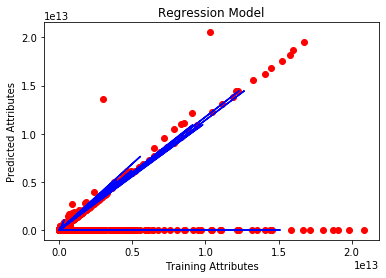

In [84]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Regression Model')
plt.xlabel('Training Attributes')
plt.ylabel('Predicted Attributes')
plt.show()

Printing Accuracy and Errors:

In [85]:
print("Accuracy of Decision tree is:", regressor.score(X_test, Y_test))

Accuracy of Decision tree is: 0.9989723591491761


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 1267894151.196769
Mean Squared Error: 2.0459127099003385e+20
Root Mean Squared Error: 14303540505.41452


#### 4.6. KNeighbour Regression

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. Algorithm A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors. Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

Selecting attributes :

In [87]:
data = WoRLD_data.copy()
X = data[['Adjusted net national income (current US$)',
             'Adjusted savings: consumption of fixed capital (current US$)',
             'Broad money (% of GDP)',
             'GNI (current US$)',
             'International tourism, expenditures (current US$)',
             'Merchandise imports (current US$)']]
X.shape

(5559, 6)

In [88]:
Y = data[['GDP (current US$)',
             'Exports of goods and services (% of GDP)',
             'Gross capital formation (% of GDP)',
             'Imports of goods and services (% of GDP)',
             'International tourism, expenditures (current US$)',
             'Trade (% of GDP)']]
Y.shape

(5559, 6)

Selecting test and training data for modelling:

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

Performing regression and fitting it.

In [90]:
reg = KNeighborsRegressor(n_neighbors=4)

In [91]:
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')


Predicting values from the model:

In [92]:
y_pred = regressor.predict(X_test)

Plotting Training vs Predicted plot:

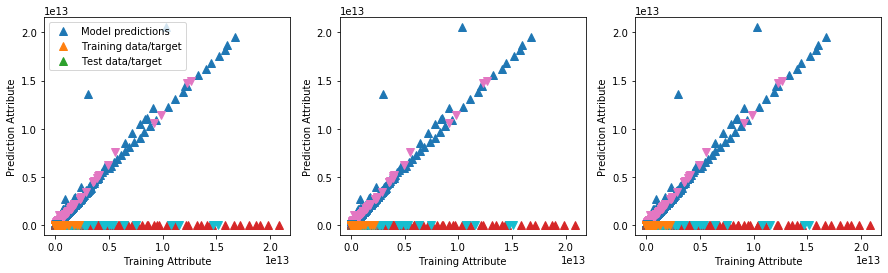

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, Y_train)
    ax.plot(X_train, Y_train, '^', markersize=8)
    ax.plot(X_test, Y_test, 'v', markersize=8)
    ax.set_xlabel("Training Attribute")
    ax.set_ylabel("Prediction Attribute")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Printing Accuracy and Errors:

In [94]:
print("Accuracy of K Neighbour Regression is: ",reg.score(X_test, Y_test))

Accuracy of K Neighbour Regression is:  0.9990947419592386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 1267894151.196769
Mean Squared Error: 2.0459127099003385e+20
Root Mean Squared Error: 14303540505.41452


### Model Result

#### Single Variable Linear Regression
Accuracy of Single Linear Regression is: 0.9997341794552852

Mean Absolute Error: 6135536198.336899

Mean Squared Error: 2.782001555332744e+20

Root Mean Squared Error: 16679333186.11012

#### Multi Variable Linear Regression
Accuracy of Multi Linear Regression is: 0.9996940874210041

Mean Absolute Error: 5939323690.464933

Mean Squared Error: 3.151421943522434e+20

Root Mean Squared Error: 17752244769.387432

#### Multi Variabe Linear Regression with Label Encoder
Accuracy of Multi Linear Regression with Label Encoder is: 0.999687075002467

Mean Absolute Error: 6641395174.703767

Mean Squared Error: 4.937258380260169e+20

Root Mean Squared Error: 22219942349.745575

#### Random Forest
Accuracy of Random Forest with estimator 500 is: 0.9845975520701287

Accuracy of Random Forest with normal regression is: 0.9877940879889848

Mean Absolute Error: 82714111511.19867

Mean Squared Error: 5.3826623941148224e+23

Root Mean Squared Error: 733666299765.4194

#### Decision Tree
Accuracy of Decision tree is: 0.9989723591491761

Mean Absolute Error: 1267894151.196769

Mean Squared Error: 2.0459127099003385e+20

Root Mean Squared Error: 14303540505.41452

#### KNeighbour Regression
Accuracy of K Neighbour Regression is:  0.9990947419592386

Mean Absolute Error: 1267894151.196769

Mean Squared Error: 2.0459127099003385e+20

Root Mean Squared Error: 14303540505.41452

#### Final Conclusion
As the data seems to be linear so the accuracy of Linear regression is high but it throws a higher Mean absolute Error and Root Mean Squared error so it is not fit for modelling.

We can also see that Random forest regression performed worst among all.

There is tough fight between Decision tree and K Neighbour but the best result is shown by K Neighbour Regression model with lowest RMSE and highest Accuracy, though just slight variation, so the winner is KNeighbour Regression model.

As the data is time varying so it's good to have some time series analysis which can be used to predict data. Let's see how ARIMA modelling throws result.

### 5. GNI Prediction using TS

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.
Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales. 

As most of the attributes are related to GDP so chosing to predict GNI which is highly corelated with GDP.

#### 5.1. Preparing TS dataframe

In [96]:
#Using function Read_country to extract Country wise data
TS = Read_country("WoRLD_Data.csv", "USA", cols = ["Year", "GNI (current US$)"])

TS.head()

Year  GNI (current US$)
5298  1990   5902290000000.00
5299  1991   6096750000000.00
5300  1992   6435470000000.00
5301  1993   6733770000000.00
5302  1994   7170250000000.00

We can see that the data has time object as index and GDP as the column. We can cross-check the datatype of the index with the following command:

In [97]:
con=TS['Year']
TS['Year'] = datetime_conv(TS['Year'])
TS['Year']=pd.to_datetime(TS['Year'])
TS.set_index('Year', inplace=True)
#check datatype of index
TS.index

DatetimeIndex(['1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [98]:
#convert to time series:
ts = TS["GNI (current US$)"]
ts.head()

Year
1990-12-31   5902290000000.00
1991-12-31   6096750000000.00
1992-12-31   6435470000000.00
1993-12-31   6733770000000.00
1994-12-31   7170250000000.00
Name: GNI (current US$), dtype: float64

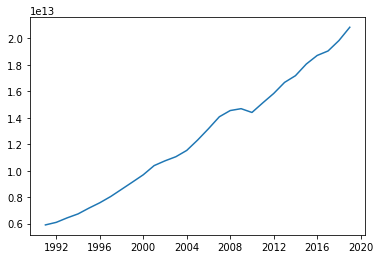

In [99]:
plt.plot(ts)

#### 5.2. Check for Stationarity

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [100]:
#Check for stationarity
X = ts.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.788278
p-value: 0.998325
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


The smaller p-value, the more likely it's stationary. Here our p-value is 0.99. It's actually very bad as it's close to 1, this series would be considered non-stationary.

To resolve it lets take a log of TS.

In [101]:
X = ts.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.569748
p-value: 0.099412
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


p-value just decreased much and closer to singularity but still greater than 0.05 which means wither its non-singular TS or the data count is less which is exactly here that we have only single data per year. Lets move forward with final confirmation from rolling mean.

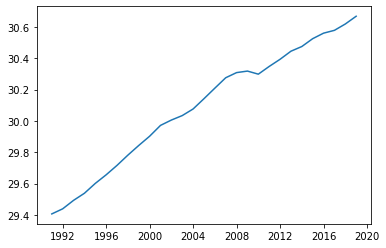

In [102]:
ts_log= log(ts)
plt.plot(ts_log)

#### 5.3. Removing Stationarity, Seasonality and Trend

We take average of ‘k’ consecutive values depending on the frequency of time series.

##### 5.3.1. Removing Stationarity

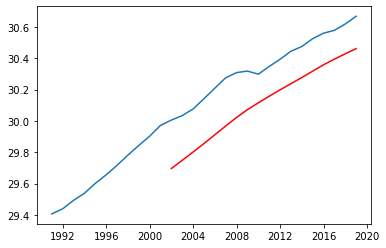

In [103]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series.

In [104]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

Year
1990-12-31    nan
1991-12-31    nan
1992-12-31    nan
1993-12-31    nan
1994-12-31    nan
1995-12-31    nan
1996-12-31    nan
1997-12-31    nan
1998-12-31    nan
1999-12-31    nan
2000-12-31    nan
2001-12-31   0.31
2002-12-31   0.29
2003-12-31   0.27
2004-12-31   0.29
2005-12-31   0.30
2006-12-31   0.31
2007-12-31   0.29
2008-12-31   0.25
2009-12-31   0.18
2010-12-31   0.19
2011-12-31   0.19
2012-12-31   0.21
2013-12-31   0.20
2014-12-31   0.21
2015-12-31   0.20
2016-12-31   0.18
2017-12-31   0.19
2018-12-31   0.21
Name: GNI (current US$), dtype: float64

Lets drop these NaN values and check the plots to test stationarity.

In [105]:
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head(20)

Year
2001-12-31   0.31
2002-12-31   0.29
2003-12-31   0.27
2004-12-31   0.29
2005-12-31   0.30
2006-12-31   0.31
2007-12-31   0.29
2008-12-31   0.25
2009-12-31   0.18
2010-12-31   0.19
2011-12-31   0.19
2012-12-31   0.21
2013-12-31   0.20
2014-12-31   0.21
2015-12-31   0.20
2016-12-31   0.18
2017-12-31   0.19
2018-12-31   0.21
Name: GNI (current US$), dtype: float64

##### 5.3.2. Removing Trend and Seasonality

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

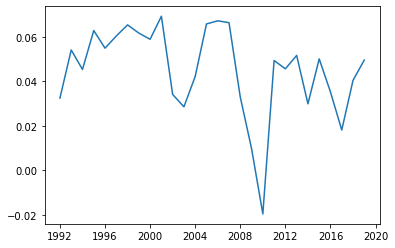

In [106]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

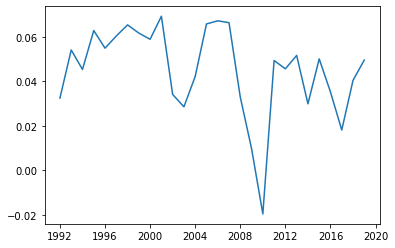

In [107]:
ts_log_diff.dropna(inplace = True)
plt.plot(ts_log_diff)

In [108]:
X = ts_log_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.274440
p-value: 0.016060
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


p-value = 0.016 which is less than 0.05 so it is good for modelling in ARIMA model

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 5% critical value, thus the TS is stationary with 95% confidence.

With Decomposition approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

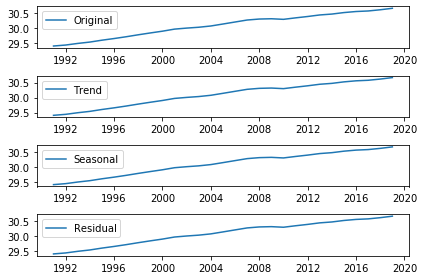

In [109]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(ts_log, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(ts_log, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(ts_log, label = 'Residual')
plt.legend(loc = 'best')
plt.tight_layout()

In [110]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

In [111]:
X = ts_log_decompose.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: nan
p-value: nan
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


We can see that p-value is nan means there isn't any residual so we are god to go with first level difference as it is singular ts with confidence level of 90%.

#### 5.4. Forecasting Values : Modelling

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

-- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

-- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

-- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

In [112]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

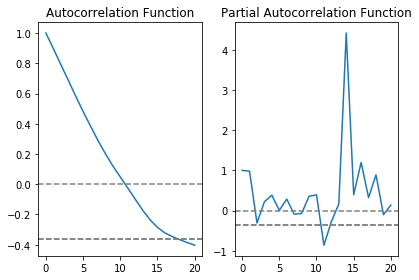

In [113]:
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle ='--', color = 'gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)), linestyle ='--', color = 'gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


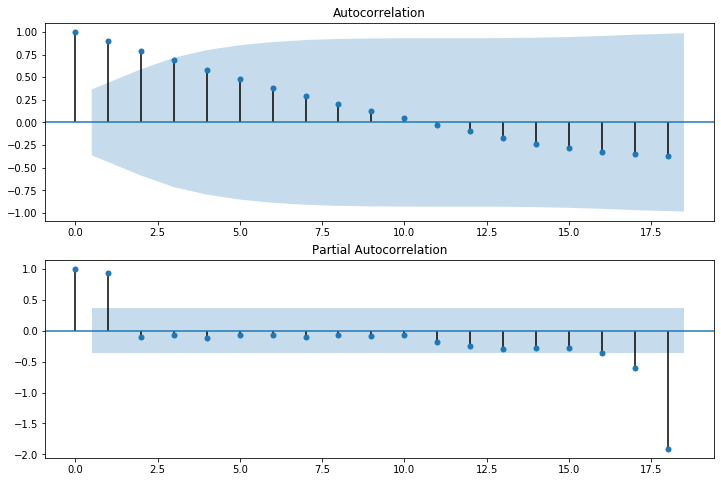

In [114]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log, lags=18, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log, lags=18, ax=ax2)

As seen above ts_log is having p value grater than 0.05 which means not proper for modelling same can be seen with acf and pacf plots as well.

Continuing with ts_log_diff which has better p-value = 0.016 which is less than 0.05 so it is good for modelling in ARIMA model.

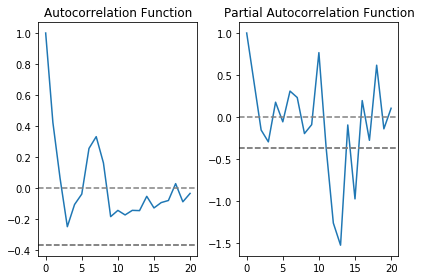

In [115]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle ='--', color = 'gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle ='--', color = 'gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

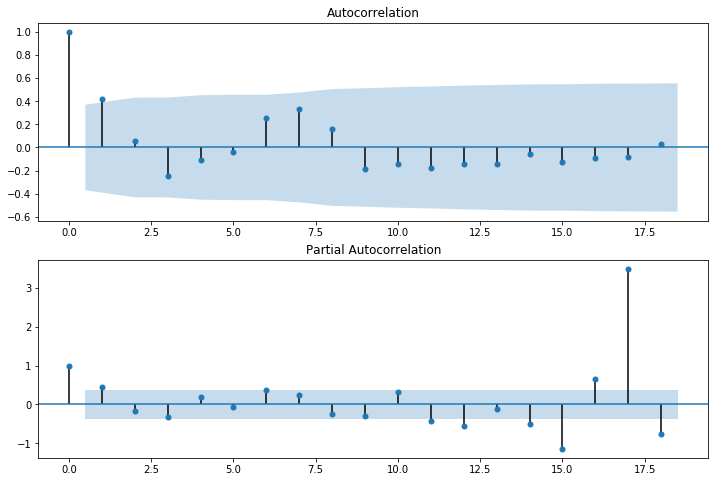

In [116]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff, lags=18, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=18, ax=ax2)

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p = 2.

d - The number of differences we took to have singular ts ready. here we had only one time difference of shift by forming ts_log_diff from ts_log by removing shift. So, in this case d = 1

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q = 2.

#### 5.4.1. AR (Auto-Regressive) Model

RSS = 0.008738962059767964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


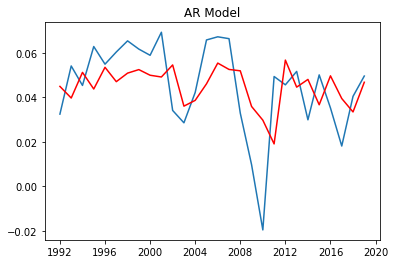

In [117]:
#AR model
model = ARIMA(ts_log, order = (2,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("AR Model")
print("RSS =", sum((result_AR.fittedvalues-ts_log_diff)**2))

In [118]:
print(result_AR.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.GNI (current US$)   No. Observations:                   28
Model:                  ARIMA(2, 1, 0)   Log Likelihood                  73.216
Method:                        css-mle   S.D. of innovations              0.018
Date:                 Mon, 16 Mar 2020   AIC                           -138.433
Time:                         22:29:36   BIC                           -133.104
Sample:                     12-31-1991   HQIC                          -136.804
                          - 12-31-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0449      0.005      9.075      0.000       0.035       0.055
ar.L1.D.GNI (current US$)     0.4826      0.187      2.584      0.016       0.

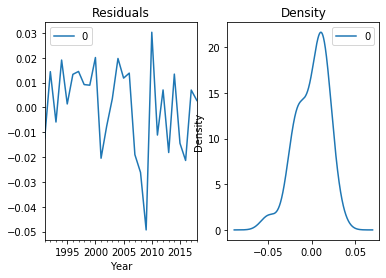

In [119]:
# Plot residual errors
residuals = pd.DataFrame(result_AR.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

##### 5.4.2. MA (Moving Average) Model

RSS = 0.008282689990289862


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


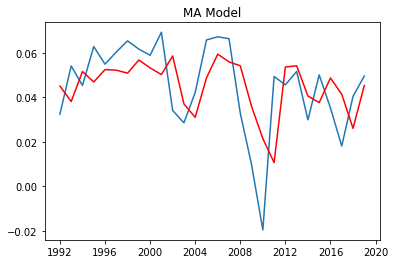

In [120]:
#MA model
model = ARIMA(ts_log, order = (0,1,2))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_MA.fittedvalues, color='red')
plt.title("MA Model")
print("RSS =", sum((result_MA.fittedvalues-ts_log_diff)**2))

In [121]:
print(result_MA.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.GNI (current US$)   No. Observations:                   28
Model:                  ARIMA(0, 1, 2)   Log Likelihood                  73.897
Method:                        css-mle   S.D. of innovations              0.017
Date:                 Mon, 16 Mar 2020   AIC                           -139.794
Time:                         22:29:37   BIC                           -134.465
Sample:                     12-31-1991   HQIC                          -138.164
                          - 12-31-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0450      0.006      7.225      0.000       0.033       0.057
ma.L1.D.GNI (current US$)     0.6065      0.243      2.499      0.019       0.

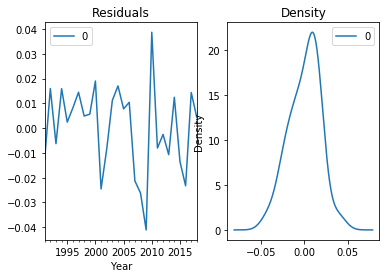

In [122]:
# Plot residual errors
residuals = pd.DataFrame(result_MA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

##### 5.4.3 ARIMA (Auto-Regressive Integrated Moving Averages) Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


RSS = 0.007046158482756724


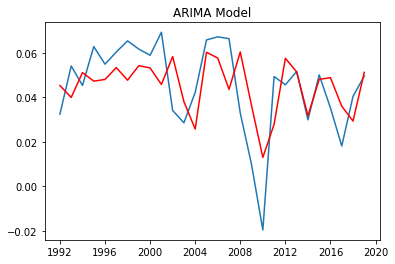

In [123]:
#ARIMA model
model = ARIMA(ts_log, order = (2,1,2))
result_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title("ARIMA Model")
print("RSS =", sum((result_ARIMA.fittedvalues-ts_log_diff)**2))

In [124]:
print(result_ARIMA.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.GNI (current US$)   No. Observations:                   28
Model:                  ARIMA(2, 1, 2)   Log Likelihood                  75.979
Method:                        css-mle   S.D. of innovations              0.015
Date:                 Mon, 16 Mar 2020   AIC                           -139.958
Time:                         22:29:37   BIC                           -131.964
Sample:                     12-31-1991   HQIC                          -137.514
                          - 12-31-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0453      0.005      9.414      0.000       0.036       0.055
ar.L1.D.GNI (current US$)    -0.4258      0.212     -2.008      0.057      -0.

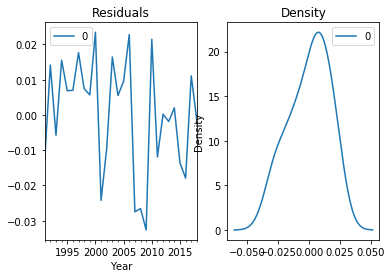

In [125]:
# Plot residual errors
residuals = pd.DataFrame(result_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

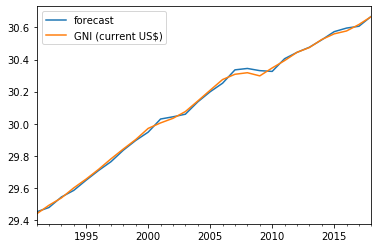

In [126]:
result_ARIMA.plot_predict(dynamic=False)
plt.show()

Here we can see that the AR and MA models have almost the same RSS but combined is better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

##### 5.4.4. Rescaling

Store the predicted results as a separate series and observe it.

In [127]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
prediction_ARIMA_diff.head()

Year
1991-12-31   0.05
1992-12-31   0.04
1993-12-31   0.05
1994-12-31   0.05
1995-12-31   0.05
dtype: float64

The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [128]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_diff_cumsum.head()

Year
1991-12-31   0.05
1992-12-31   0.09
1993-12-31   0.14
1994-12-31   0.18
1995-12-31   0.23
dtype: float64

 Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [129]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Year
1990-12-31   29.41
1991-12-31   29.45
1992-12-31   29.49
1993-12-31   29.54
1994-12-31   29.59
1995-12-31   29.64
1996-12-31   29.69
1997-12-31   29.74
1998-12-31   29.79
1999-12-31   29.85
2000-12-31   29.89
2001-12-31   29.95
2002-12-31   29.99
2003-12-31   30.01
2004-12-31   30.07
2005-12-31   30.13
2006-12-31   30.18
2007-12-31   30.24
2008-12-31   30.27
2009-12-31   30.28
2010-12-31   30.31
2011-12-31   30.37
2012-12-31   30.42
2013-12-31   30.45
2014-12-31   30.50
2015-12-31   30.55
2016-12-31   30.59
2017-12-31   30.62
2018-12-31   30.67
dtype: float64

We can see that the final logarithmic value is 30.67 and that of year 2018. So to have our forecast we are going to predict for next 20 years with the confidence of 95%.

Last step is to take the exponent and compare with the original series.

RMSE is : 530473384922.0501


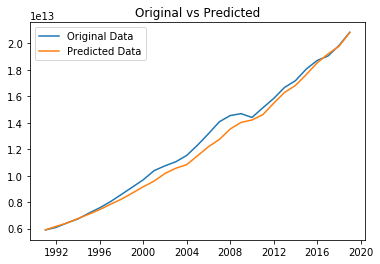

In [130]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, label = 'Original Data')
plt.legend(loc='best')
plt.plot(predictions_ARIMA, label = 'Predicted Data')
plt.legend(loc='best')
plt.title("Original vs Predicted")
RMSE = np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts))
print("RMSE is :", RMSE)

#### 5.5. Forecasting Values 

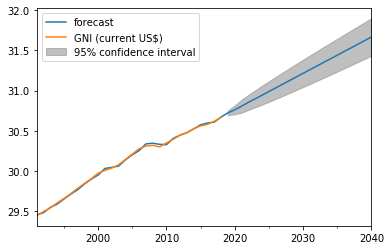

In [131]:
#predicting the value starting 1990 for next 50 years and plot the graph for same
result_ARIMA.plot_predict(1,50)

#forecasted value of GNI for next 20 years starting 2019 till 2040
x = result_ARIMA.forecast(steps=20)

In [132]:
#predicted vs forecasted values of GNI starting 2019
x[2]

array([[30.69314025, 30.75133311],
       [30.70482822, 30.81619167],
       [30.72458329, 30.88674745],
       [30.7591908 , 30.94750404],
       [30.79162103, 31.00364905],
       [30.82439841, 31.06063511],
       [30.85988121, 31.116697  ],
       [30.89569628, 31.17126788],
       [30.93179913, 31.22544425],
       [30.96870483, 31.2792536 ],
       [31.00602651, 31.33249735],
       [31.04363697, 31.38536919],
       [31.08161665, 31.43795763],
       [31.11989255, 31.4902413 ],
       [31.15840612, 31.54226203],
       [31.19715435, 31.59406174],
       [31.23611419, 31.64565256],
       [31.27525979, 31.69705186],
       [31.3145786 , 31.74827948],
       [31.35405761, 31.79934818]])

# END of Project